In [1]:
import pandas
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from osgeo import gdal, ogr, osr, gdal_array, gdalconst
from pyproj import Proj, transform
import struct
import sys

import seaborn as sns
sns.set(color_codes=True)

import os

import gdal
import geopandas as gpd
import georasters as gr

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from PIL import Image

In [2]:
hour00 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour00.xyz", header= None, delim_whitespace= True, encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp00']
hour00.columns = names

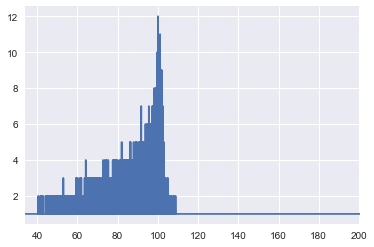

In [3]:
hour00['Temp00'].value_counts().sort_index().plot()

In [4]:
xyz_file = pandas.read_csv("./temperature_xyz/temp_avg_hour00.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64)
print(type(xyz_file))
names = ['Longitude', 'Latitude', 'Temp']
xyz_dataframe = pandas.DataFrame(xyz_file)
print(type(xyz_dataframe))
xyz_dataframe.columns = names
#xyz_dataframe.set_index('Longtitude', inplace=True)
xyz_dataframe.head()
xyz_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


(259200, 3)

In [5]:
xyz_dataframe.columns

Index(['Longitude', 'Latitude', 'Temp'], dtype='object')

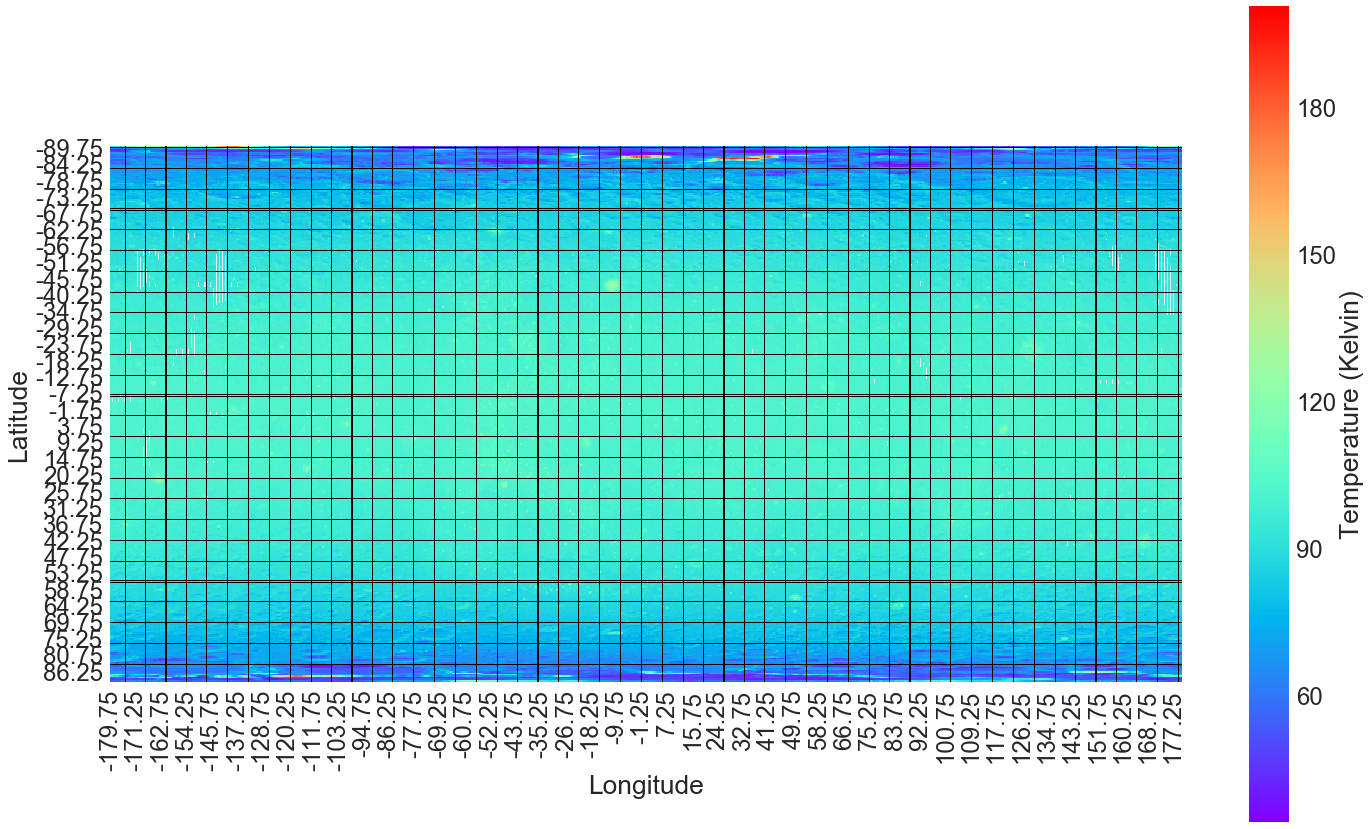

In [6]:
temp = xyz_dataframe.pivot('Latitude', 'Longitude', 'Temp')
# make figure bigger
plt.figure(figsize=(24, 15))

# draw heatmap
sns.set(font_scale=2.4)
ax = sns.heatmap(temp, cmap="rainbow", linewidths=.0003, linecolor="black", square = True, cbar_kws={'label': 'Temperature (Kelvin)'})

In [7]:
# hour 1
hour01 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour01.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp01']
hour01.columns = names
completeDataframe = hour00.merge(hour01,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 2
hour02 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour02.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp02']
hour02.columns = names
completeDataframe = completeDataframe.merge(hour02,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 3
hour03 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour03.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp03']
hour03.columns = names

completeDataframe = completeDataframe.merge(hour03,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 4
hour04 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour04.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp04']
hour04.columns = names
completeDataframe = completeDataframe.merge(hour04,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 5
hour05 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour05.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp05']
hour05.columns = names
completeDataframe = completeDataframe.merge(hour05,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 6
hour06 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour06.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp06']
hour06.columns = names
completeDataframe = completeDataframe.merge(hour06,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 7
hour07 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour07.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp07']
hour07.columns = names
completeDataframe = completeDataframe.merge(hour07,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 8
hour08 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour08.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp08']
hour08.columns = names
completeDataframe = completeDataframe.merge(hour08,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 9
hour09 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour09.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp09']
hour09.columns = names
completeDataframe = completeDataframe.merge(hour09,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 10
hour10 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour10.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp10']
hour10.columns = names
completeDataframe = completeDataframe.merge(hour10,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 11
hour11 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour11.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp11']
hour11.columns = names
completeDataframe = completeDataframe.merge(hour11,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 12
hour12 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour12.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp12']
hour12.columns = names
completeDataframe = completeDataframe.merge(hour12,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 13
hour13 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour13.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp13']
hour13.columns = names
completeDataframe = completeDataframe.merge(hour13,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 14
hour14 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour14.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp14']
hour14.columns = names
completeDataframe = completeDataframe.merge(hour14,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 15
hour15 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour15.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp15']
hour15.columns = names
completeDataframe = completeDataframe.merge(hour15,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 16
hour16 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour16.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp16']
hour16.columns = names
completeDataframe = completeDataframe.merge(hour16,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 17
hour17 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour17.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp17']
hour17.columns = names
completeDataframe = completeDataframe.merge(hour17,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 18
hour18 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour18.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp18']
hour18.columns = names
completeDataframe = completeDataframe.merge(hour18,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 19
hour19 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour19.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp19']
hour19.columns = names
completeDataframe = completeDataframe.merge(hour19,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 20
hour20 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour20.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp20']
hour20.columns = names
completeDataframe = completeDataframe.merge(hour20,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 21
hour21 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour21.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp21']
hour21.columns = names
completeDataframe = completeDataframe.merge(hour21,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 22
hour22 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour22.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp22']
hour22.columns = names
completeDataframe = completeDataframe.merge(hour22,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# hour 23
hour23 = pandas.DataFrame(pandas.read_csv("./temperature_xyz/temp_avg_hour23.xyz",header= None, delim_whitespace= True,encoding="utf-8-sig", dtype=numpy.float64))
names = ['Longitude', 'Latitude', 'Temp23']
hour23.columns = names
completeDataframe = completeDataframe.merge(hour23,left_on=["Longitude", "Latitude"],right_on=["Longitude", "Latitude"],how="outer")

# lets see first 5 rows
completeDataframe.head()


Longitude  Latitude   Temp00   Temp01   Temp02   Temp03   Temp04   Temp05  \
0    -179.75    -89.75  92.3449  90.8704  76.7798  75.3796  70.1391  66.0686   
1    -179.75    -89.25  58.3161  57.5714  58.9037  58.6666  60.2520  58.5871   
2    -179.75    -88.75  41.8690  40.1790  41.0746  40.5256  42.2474  45.3841   
3    -179.75    -88.25  43.7719  46.8314  53.8343  53.4819  69.3344  53.1966   
4    -179.75    -87.75  70.0496  68.8630  68.6054  67.0572  66.9253  66.1375   

    Temp06    Temp07    ...       Temp14    Temp15    Temp16    Temp17  \
0  64.5926   66.2606    ...     166.6698  149.5256  183.4179  127.5747   
1  80.4071  140.7691    ...     210.7230  169.6501  172.4265  116.6059   
2  45.5080   65.5288    ...      87.9093   71.1999   67.4599   97.6605   
3  52.2264   66.7543    ...     105.0088   96.6408   71.9722   68.1481   
4  76.0957  101.1241    ...     211.1974  205.3809  169.6200   98.1868   

     Temp18    Temp19    Temp20    Temp21    Temp22    Temp23  
0  192.8222  192.0609  215.8038  201.2781  183.1216  132.7214  
1   87.3768   75.2170   71.2458   65.3919   62.2980   59.3585  
2   71.3737   51.8248   48.0895   45.4478   43.7981   42.8010  
3   62.7863   62.1557   60.7863   53.8611   46.7643   49.0096  
4   89.1934   84.4970   77.8709   74.4416   73.1602   70.7680  

[5 rows x 26 columns]

In [8]:
# see last 5 rows
completeDataframe.tail()

Longitude  Latitude    Temp00   Temp01   Temp02   Temp03    Temp04  \
259195     179.75     87.75   83.8091  66.0935  60.4190  55.9119   52.6238   
259196     179.75     88.25  105.1097  92.1183  81.5124  72.5078   50.9265   
259197     179.75     88.75   51.7639  96.4189  66.7198  76.7582   50.1481   
259198     179.75     89.25   45.7858  42.0905  59.2057  73.6728  102.8890   
259199     179.75     89.75   52.6592  88.4585  52.3891  61.7416   75.4633   

         Temp05    Temp06   Temp07    ...       Temp14    Temp15    Temp16  \
259195  52.7694   56.0881  59.8633    ...     185.6142  181.6607  179.4889   
259196  48.3947   60.0494  58.5220    ...     151.7787  145.3468  167.3110   
259197  59.7836   45.3259  44.3181    ...     126.9265  113.2164  155.2033   
259198  50.2323   82.7290  48.3083    ...     118.7344  102.2307   88.5348   
259199  72.5817  101.4893  75.4900    ...      98.3355  156.0179  106.9094   

          Temp17    Temp18    Temp19    Temp20    Temp21    Temp22    Temp23  
259195  161.6570  142.1118   97.3590   77.4099   80.5785  101.6735   94.8738  
259196  163.1201  166.0314  165.5427  166.4170  150.3271  118.9427  100.8650  
259197  137.1199  163.9805  149.9411  148.4394   82.3630   58.5843   50.0023  
259198   71.8783   61.6379   56.6683   55.3456   54.9306   50.5142   43.6973  
259199   80.1773   58.3411   60.5225   53.5098   63.8565   55.3772   85.1596  

[5 rows x 26 columns]

In [9]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams['figure.figsize'] = fig_size

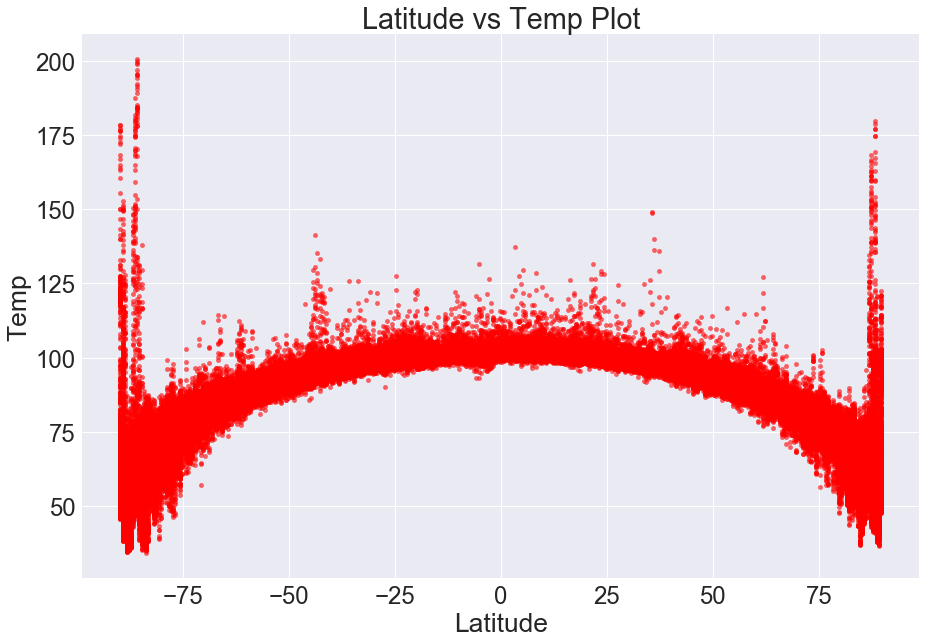

In [10]:
xyz_dataframe.plot(kind = 'scatter', x = 'Latitude', y='Temp', alpha = .6, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title('Latitude vs Temp Plot')
plt.show()

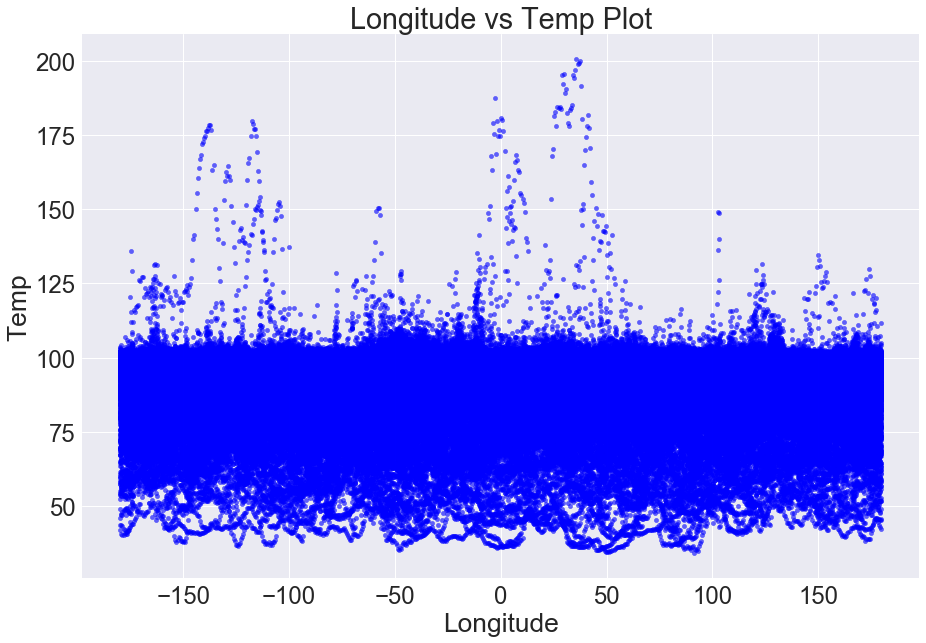

In [11]:
xyz_dataframe.plot(kind = 'scatter', x = 'Longitude', y='Temp', alpha = .6, color = 'blue')
plt.xlabel('Longitude')
plt.ylabel('Temp')
plt.title('Longitude vs Temp Plot')
plt.show()

In [12]:
def lat_long_to_decimal(value):
    if(value < 0):
        degrees = math.ceil(value)
        minute = math.ceil(60 * (value - degrees))
        second = (60 * (value - degrees) - minute) * 60
    else:
        degrees = math.floor(value)
        minute = math.floor(60 * (value - degrees))
        second = (60 * (value - degrees) - minute) * 60
    return (str(degrees)+u'\N{DEGREE SIGN}'+str(minute)+"\""+str(int(second)))


In [13]:
xyz_dataframe['Lon DD'] = xyz_dataframe['Longitude'].map(lambda x: lat_long_to_decimal(x))
xyz_dataframe['Lat DD'] = xyz_dataframe['Latitude'].map(lambda x: lat_long_to_decimal(x))

In [14]:
xyz_dataframe.head()

Longitude  Latitude     Temp      Lon DD     Lat DD
0    -179.75    -89.75  92.3449  -179°-45"0  -89°-45"0
1    -179.75    -89.25  58.3161  -179°-45"0  -89°-15"0
2    -179.75    -88.75  41.8690  -179°-45"0  -88°-45"0
3    -179.75    -88.25  43.7719  -179°-45"0  -88°-15"0
4    -179.75    -87.75  70.0496  -179°-45"0  -87°-45"0

In [15]:
print(type(xyz_dataframe['Lat DD'][0]))

<class 'str'>


In [16]:
xyz_dataframe['Lat DD'] = xyz_dataframe['Lat DD'].map(lambda x: x+' N' if "-" not in x else x.replace('-', "")+' S')
xyz_dataframe['Lon DD'] = xyz_dataframe['Lon DD'].map(lambda x: x+' E' if "-" not in x else x.replace('-', "")+' W')

In [17]:
xyz_dataframe.head()

Longitude  Latitude     Temp      Lon DD     Lat DD
0    -179.75    -89.75  92.3449  179°45"0 W  89°45"0 S
1    -179.75    -89.25  58.3161  179°45"0 W  89°15"0 S
2    -179.75    -88.75  41.8690  179°45"0 W  88°45"0 S
3    -179.75    -88.25  43.7719  179°45"0 W  88°15"0 S
4    -179.75    -87.75  70.0496  179°45"0 W  87°45"0 S

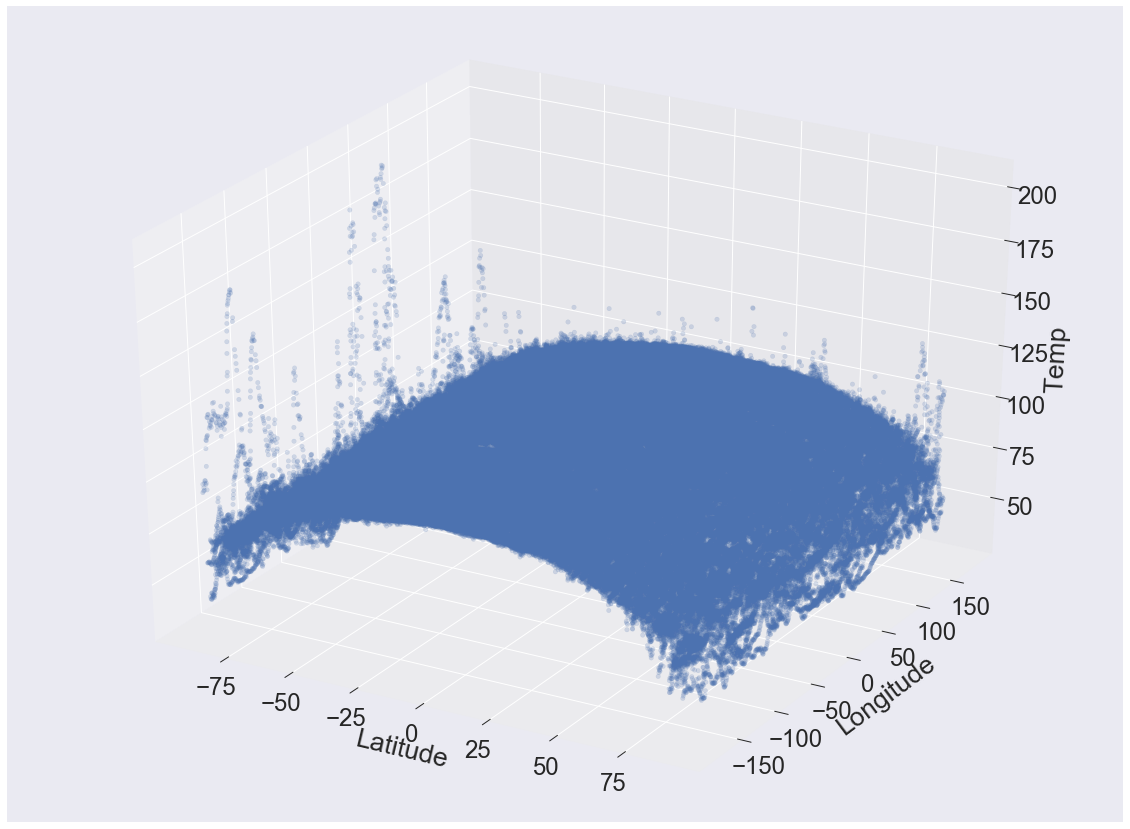

In [18]:
fig = plt.figure(figsize = (20,15))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(xyz_dataframe['Latitude'], xyz_dataframe['Longitude'], xyz_dataframe['Temp'], c = 'b', marker = 'o', alpha = 0.2)

ax.set_xlabel('\nLatitude')
ax.set_ylabel('\nLongitude')
ax.set_zlabel('\nTemp')

plt.show()

In [19]:
completeDataframe.shape

(259200, 26)

In [20]:
completeDataframe['Mean'] = completeDataframe[completeDataframe.columns[2:]].mean(axis = 1)
completeDataframe['Mean'].head()

0    139.301333
1    118.606092
2     65.459800
3     89.405746
4    125.239929
Name: Mean, dtype: float64

In [21]:
print(completeDataframe.head())

   Longitude  Latitude   Temp00   Temp01   Temp02   Temp03   Temp04   Temp05  \
0    -179.75    -89.75  92.3449  90.8704  76.7798  75.3796  70.1391  66.0686   
1    -179.75    -89.25  58.3161  57.5714  58.9037  58.6666  60.2520  58.5871   
2    -179.75    -88.75  41.8690  40.1790  41.0746  40.5256  42.2474  45.3841   
3    -179.75    -88.25  43.7719  46.8314  53.8343  53.4819  69.3344  53.1966   
4    -179.75    -87.75  70.0496  68.8630  68.6054  67.0572  66.9253  66.1375   

    Temp06    Temp07     ...        Temp15    Temp16    Temp17    Temp18  \
0  64.5926   66.2606     ...      149.5256  183.4179  127.5747  192.8222   
1  80.4071  140.7691     ...      169.6501  172.4265  116.6059   87.3768   
2  45.5080   65.5288     ...       71.1999   67.4599   97.6605   71.3737   
3  52.2264   66.7543     ...       96.6408   71.9722   68.1481   62.7863   
4  76.0957  101.1241     ...      205.3809  169.6200   98.1868   89.1934   

     Temp19    Temp20    Temp21    Temp22    Temp23        Mea

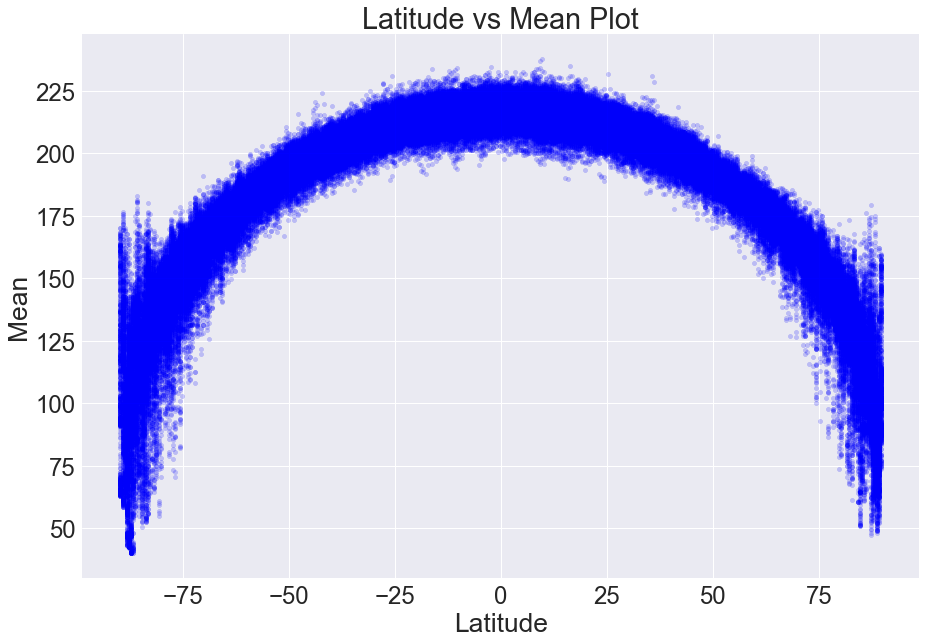

In [22]:
completeDataframe.plot(kind = 'scatter', x = 'Latitude', y='Mean', alpha = .2, color = 'blue')
plt.xlabel('Latitude')
plt.ylabel('Mean')
plt.title('Latitude vs Mean Plot')
plt.show()

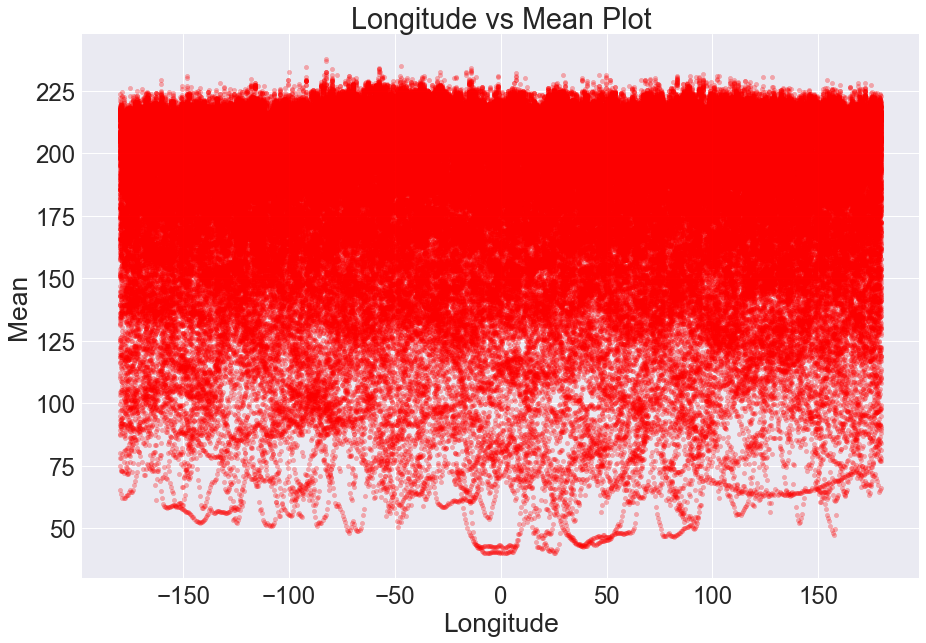

In [23]:
completeDataframe.plot(kind = 'scatter', x = 'Longitude', y='Mean', alpha = .3, color = 'red')
plt.xlabel('Longitude')
plt.ylabel('Mean')
plt.title('Longitude vs Mean Plot')
plt.show()

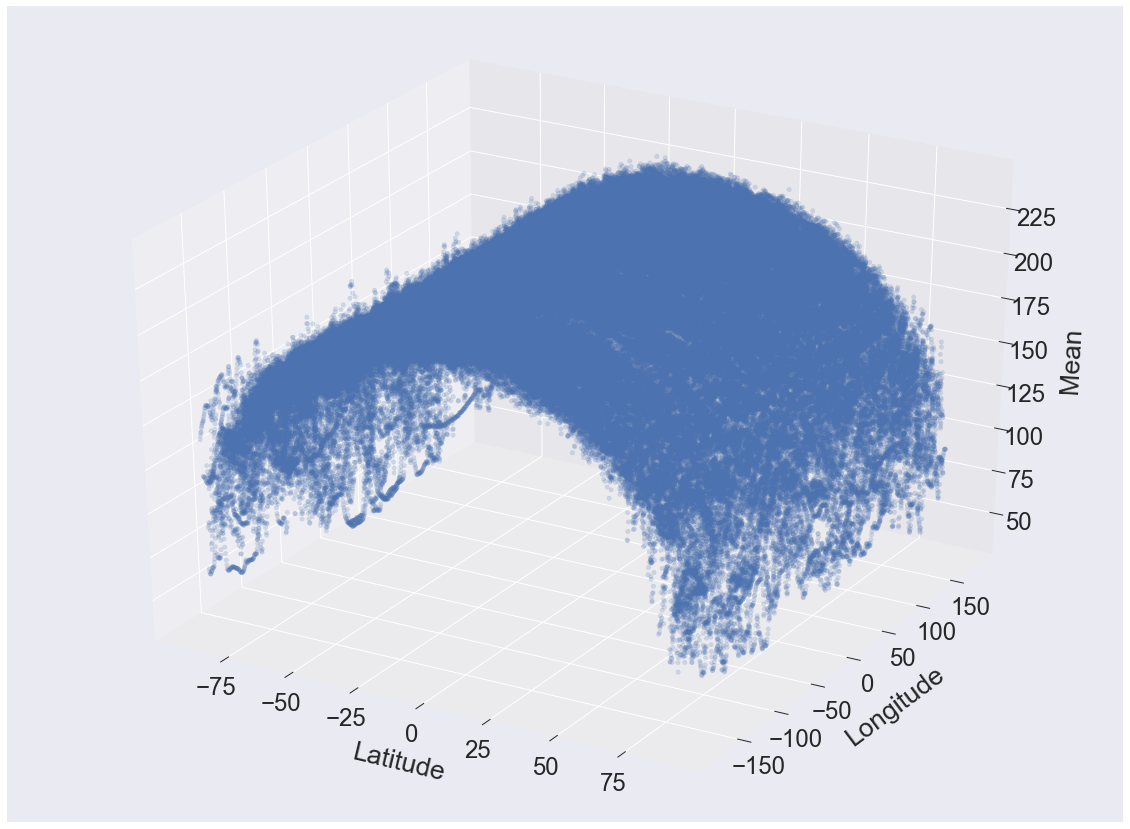

In [24]:
fig = plt.figure(figsize = (20,15))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(completeDataframe['Latitude'], completeDataframe['Longitude'], completeDataframe['Mean'], c = 'b', marker = 'o', alpha = 0.2)

ax.set_xlabel('\n\nLatitude')
ax.set_ylabel('\n\nLongitude')
ax.set_zlabel('\n\nMean')

plt.show()

In [25]:
# def convertToLatLong(coordX, coordY):
#     inProj = Proj(init='epsg:32662')
#     outProj = Proj(init='epsg:4326')
#     return transform(inProj,outProj,coordX,coordY)

In [26]:
# test['Latitude', 'Longitude'] = test.apply(lambda x: convertToLatLong(x['x']*3.67109, x['y']*3.67109), axis = 1)

In [27]:
# convertToLatLong(-5458203.080, 2729101.540)

In [28]:
completeDataframe.head()

Longitude  Latitude   Temp00   Temp01   Temp02   Temp03   Temp04   Temp05  \
0    -179.75    -89.75  92.3449  90.8704  76.7798  75.3796  70.1391  66.0686   
1    -179.75    -89.25  58.3161  57.5714  58.9037  58.6666  60.2520  58.5871   
2    -179.75    -88.75  41.8690  40.1790  41.0746  40.5256  42.2474  45.3841   
3    -179.75    -88.25  43.7719  46.8314  53.8343  53.4819  69.3344  53.1966   
4    -179.75    -87.75  70.0496  68.8630  68.6054  67.0572  66.9253  66.1375   

    Temp06    Temp07     ...        Temp15    Temp16    Temp17    Temp18  \
0  64.5926   66.2606     ...      149.5256  183.4179  127.5747  192.8222   
1  80.4071  140.7691     ...      169.6501  172.4265  116.6059   87.3768   
2  45.5080   65.5288     ...       71.1999   67.4599   97.6605   71.3737   
3  52.2264   66.7543     ...       96.6408   71.9722   68.1481   62.7863   
4  76.0957  101.1241     ...      205.3809  169.6200   98.1868   89.1934   

     Temp19    Temp20    Temp21    Temp22    Temp23        Mean  
0  192.0609  215.8038  201.2781  183.1216  132.7214  139.301333  
1   75.2170   71.2458   65.3919   62.2980   59.3585  118.606092  
2   51.8248   48.0895   45.4478   43.7981   42.8010   65.459800  
3   62.1557   60.7863   53.8611   46.7643   49.0096   89.405746  
4   84.4970   77.8709   74.4416   73.1602   70.7680  125.239929  

[5 rows x 27 columns]

In [29]:
temperature_columns = completeDataframe.columns[2:]
temperature_dataFrame = completeDataframe[temperature_columns]
temperature_dataFrame.head()

Temp00   Temp01   Temp02   Temp03   Temp04   Temp05   Temp06    Temp07  \
0  92.3449  90.8704  76.7798  75.3796  70.1391  66.0686  64.5926   66.2606   
1  58.3161  57.5714  58.9037  58.6666  60.2520  58.5871  80.4071  140.7691   
2  41.8690  40.1790  41.0746  40.5256  42.2474  45.3841  45.5080   65.5288   
3  43.7719  46.8314  53.8343  53.4819  69.3344  53.1966  52.2264   66.7543   
4  70.0496  68.8630  68.6054  67.0572  66.9253  66.1375  76.0957  101.1241   

     Temp08    Temp09     ...        Temp15    Temp16    Temp17    Temp18  \
0  103.4712  185.0419     ...      149.5256  183.4179  127.5747  192.8222   
1  156.7773  195.5638     ...      169.6501  172.4265  116.6059   87.3768   
2   80.0167   59.7306     ...       71.1999   67.4599   97.6605   71.3737   
3  175.0145  179.5275     ...       96.6408   71.9722   68.1481   62.7863   
4  163.6566  201.8070     ...      205.3809  169.6200   98.1868   89.1934   

     Temp19    Temp20    Temp21    Temp22    Temp23        Mean  
0  192.0609  215.8038  201.2781  183.1216  132.7214  139.301333  
1   75.2170   71.2458   65.3919   62.2980   59.3585  118.606092  
2   51.8248   48.0895   45.4478   43.7981   42.8010   65.459800  
3   62.1557   60.7863   53.8611   46.7643   49.0096   89.405746  
4   84.4970   77.8709   74.4416   73.1602   70.7680  125.239929  

[5 rows x 25 columns]

In [30]:
avg_series = temperature_dataFrame[:].mean()

In [31]:
avg_series.head()

Temp00    90.578215
Temp01    89.283493
Temp02    88.000759
Temp03    86.883627
Temp04    86.148835
dtype: float64

In [32]:
min_series = temperature_dataFrame[:].min()

In [33]:
min_series.head()

Temp00    34.1681
Temp01    32.6903
Temp02    32.3317
Temp03    31.4726
Temp04    30.4970
dtype: float64

In [34]:
max_series = temperature_dataFrame[:].max()
max_series.head()

Temp00    200.6443
Temp01    224.9666
Temp02    228.4920
Temp03    242.7454
Temp04    271.9846
dtype: float64

max_dataFrame = temperature_dataFrame[:].max()
max_dataFrame.head()

In [35]:
columns = ['Avg']
min_max_avg_Dataframe = pandas.DataFrame(avg_series, columns = columns)

In [36]:
min_max_avg_Dataframe.head()

Avg
Temp00  90.578215
Temp01  89.283493
Temp02  88.000759
Temp03  86.883627
Temp04  86.148835

In [37]:
min_max_avg_Dataframe['Min'] = min_series
min_max_avg_Dataframe['Max'] = max_series

In [38]:
min_max_avg_Dataframe.tail()

Avg        Min         Max
Temp20  100.991594  37.881400  255.981600
Temp21   97.351849  36.685900  249.110200
Temp22   94.647682  34.998700  236.157900
Temp23   92.312124  36.018400  229.416500
Mean    185.604391  40.176475  237.644738

In [39]:
min_max_avg_Dataframe = min_max_avg_Dataframe[:-1] #to trim off the mean.
min_max_avg_Dataframe['Hours'] = range(24)

In [40]:
min_max_avg_Dataframe

Avg      Min       Max  Hours
Temp00   90.578215  34.1681  200.6443      0
Temp01   89.283493  32.6903  224.9666      1
Temp02   88.000759  32.3317  228.4920      2
Temp03   86.883627  31.4726  242.7454      3
Temp04   86.148835  30.4970  271.9846      4
Temp05   86.028326  30.3905  287.1987      5
Temp06  117.519332  30.3001  300.8390      6
Temp07  216.325777  28.7982  336.7816      7
Temp08  264.270002  28.7109  366.0839      8
Temp09  293.196066  30.9289  380.6451      9
Temp10  312.176012  33.6211  389.3127     10
Temp11  322.906768  33.9336  396.4261     11
Temp12  327.215849  34.7101  400.0816     12
Temp13  324.135313  34.2378  403.2699     13
Temp14  314.280251  35.5977  392.3311     14
Temp15  296.391461  32.7874  379.8644     15
Temp16  270.377291  38.2258  364.5246     16
Temp17  227.202727  39.6171  335.1538     17
Temp18  144.836295  39.5857  306.3102     18
Temp19  106.765766  36.2161  271.5961     19
Temp20  100.991594  37.8814  255.9816     20
Temp21   97.351849  36.6859  249.1102     21
Temp22   94.647682  34.9987  236.1579     22
Temp23   92.312124  36.0184  229.4165     23

In [41]:
min_max_avg_Dataframe = min_max_avg_Dataframe[:-1] #to trim off the mean.
min_max_avg_Dataframe

Avg      Min       Max  Hours
Temp00   90.578215  34.1681  200.6443      0
Temp01   89.283493  32.6903  224.9666      1
Temp02   88.000759  32.3317  228.4920      2
Temp03   86.883627  31.4726  242.7454      3
Temp04   86.148835  30.4970  271.9846      4
Temp05   86.028326  30.3905  287.1987      5
Temp06  117.519332  30.3001  300.8390      6
Temp07  216.325777  28.7982  336.7816      7
Temp08  264.270002  28.7109  366.0839      8
Temp09  293.196066  30.9289  380.6451      9
Temp10  312.176012  33.6211  389.3127     10
Temp11  322.906768  33.9336  396.4261     11
Temp12  327.215849  34.7101  400.0816     12
Temp13  324.135313  34.2378  403.2699     13
Temp14  314.280251  35.5977  392.3311     14
Temp15  296.391461  32.7874  379.8644     15
Temp16  270.377291  38.2258  364.5246     16
Temp17  227.202727  39.6171  335.1538     17
Temp18  144.836295  39.5857  306.3102     18
Temp19  106.765766  36.2161  271.5961     19
Temp20  100.991594  37.8814  255.9816     20
Temp21   97.351849  36.6859  249.1102     21
Temp22   94.647682  34.9987  236.1579     22

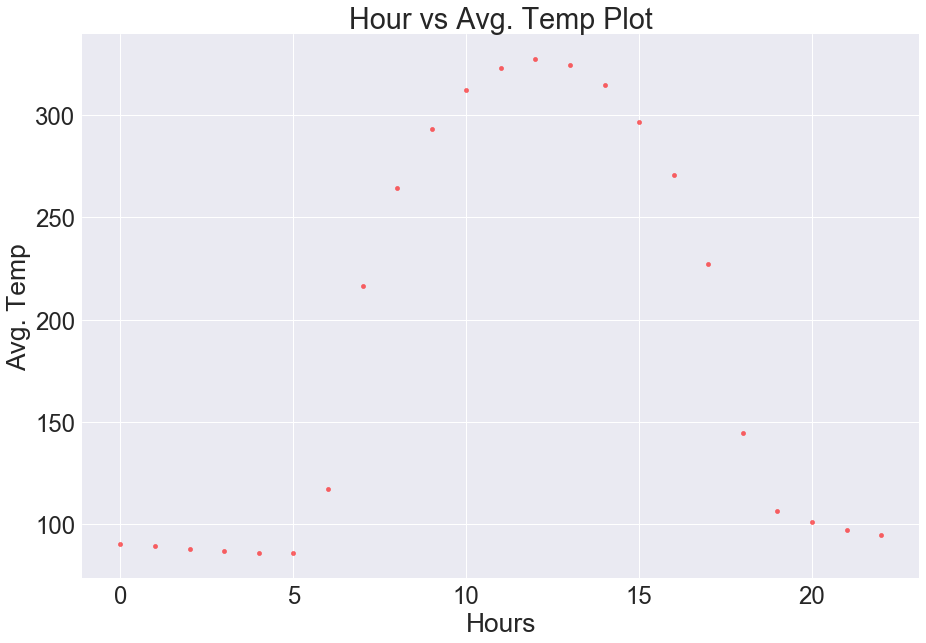

In [42]:
min_max_avg_Dataframe.plot(kind = 'scatter', x ='Hours', y='Avg', alpha = .6, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Avg. Temp')
plt.title('Hour vs Avg. Temp Plot')
plt.show()

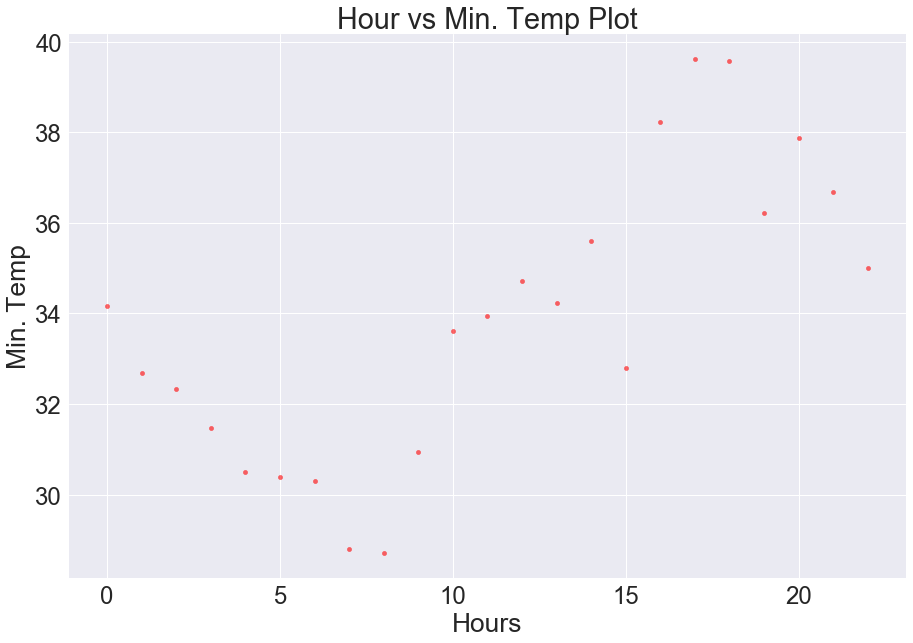

In [43]:
min_max_avg_Dataframe.plot(kind = 'scatter', x ='Hours', y='Min', alpha = .6, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Min. Temp')
plt.title('Hour vs Min. Temp Plot')
plt.show()

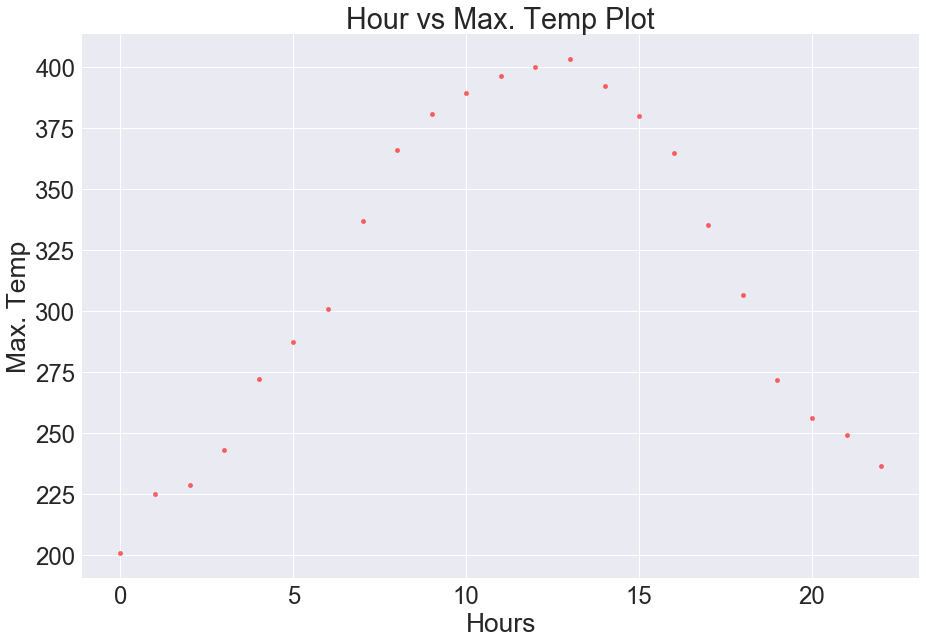

In [44]:
min_max_avg_Dataframe.plot(kind = 'scatter', x ='Hours', y='Max', alpha = .6, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Max. Temp')
plt.title('Hour vs Max. Temp Plot')
plt.show()

In [45]:
completeDataframe['Minimum'] = completeDataframe.loc[:, ['Temp00', 'Temp01', 'Temp02', 'Temp03', 'Temp04', 'Temp05', 'Temp06', 'Temp07', 'Temp08', 'Temp09', 'Temp10', 'Temp11', 'Temp12', 'Temp13', 'Temp14', 'Temp15', 'Temp16', 'Temp17', 'Temp18', 'Temp19', 'Temp20', 'Temp21', 'Temp22', 'Temp23']].min(axis=1)
completeDataframe['Maximum'] = completeDataframe.loc[:, ['Temp00', 'Temp01', 'Temp02', 'Temp03', 'Temp04', 'Temp05', 'Temp06', 'Temp07', 'Temp08', 'Temp09', 'Temp10', 'Temp11', 'Temp12', 'Temp13', 'Temp14', 'Temp15', 'Temp16', 'Temp17', 'Temp18', 'Temp19', 'Temp20', 'Temp21', 'Temp22', 'Temp23']].max(axis=1)
completeDataframe.head()

Longitude  Latitude   Temp00   Temp01   Temp02   Temp03   Temp04   Temp05  \
0    -179.75    -89.75  92.3449  90.8704  76.7798  75.3796  70.1391  66.0686   
1    -179.75    -89.25  58.3161  57.5714  58.9037  58.6666  60.2520  58.5871   
2    -179.75    -88.75  41.8690  40.1790  41.0746  40.5256  42.2474  45.3841   
3    -179.75    -88.25  43.7719  46.8314  53.8343  53.4819  69.3344  53.1966   
4    -179.75    -87.75  70.0496  68.8630  68.6054  67.0572  66.9253  66.1375   

    Temp06    Temp07    ...       Temp17    Temp18    Temp19    Temp20  \
0  64.5926   66.2606    ...     127.5747  192.8222  192.0609  215.8038   
1  80.4071  140.7691    ...     116.6059   87.3768   75.2170   71.2458   
2  45.5080   65.5288    ...      97.6605   71.3737   51.8248   48.0895   
3  52.2264   66.7543    ...      68.1481   62.7863   62.1557   60.7863   
4  76.0957  101.1241    ...      98.1868   89.1934   84.4970   77.8709   

     Temp21    Temp22    Temp23        Mean  Minimum   Maximum  
0  201.2781  183.1216  132.7214  139.301333  64.5926  215.8038  
1   65.3919   62.2980   59.3585  118.606092  57.5714  223.5388  
2   45.4478   43.7981   42.8010   65.459800  40.1790  148.1168  
3   53.8611   46.7643   49.0096   89.405746  43.7719  186.3280  
4   74.4416   73.1602   70.7680  125.239929  66.1375  229.2457  

[5 rows x 29 columns]

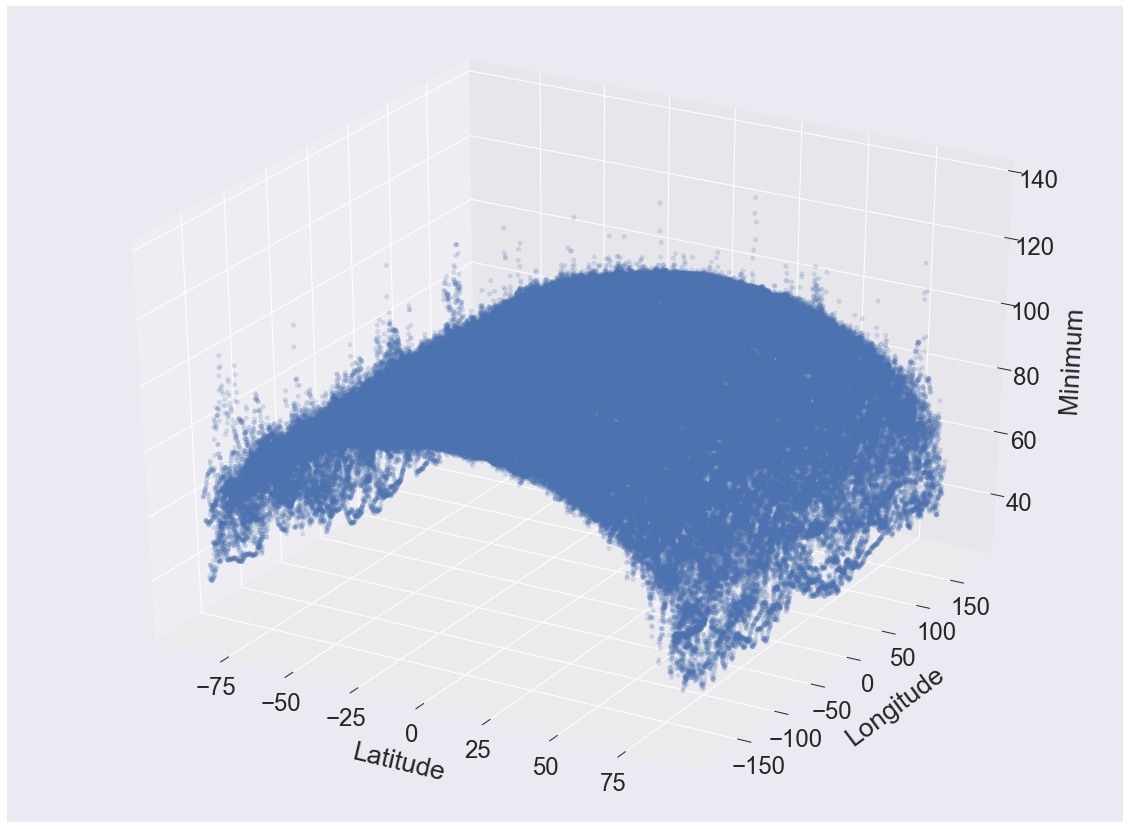

In [46]:
fig = plt.figure(figsize = (20,15))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(completeDataframe['Latitude'], completeDataframe['Longitude'], completeDataframe['Minimum'], c = 'b', marker = 'o', alpha = 0.2)

ax.set_xlabel('\n\nLatitude')
ax.set_ylabel('\n\nLongitude')
ax.set_zlabel('\n\nMinimum')

plt.show()

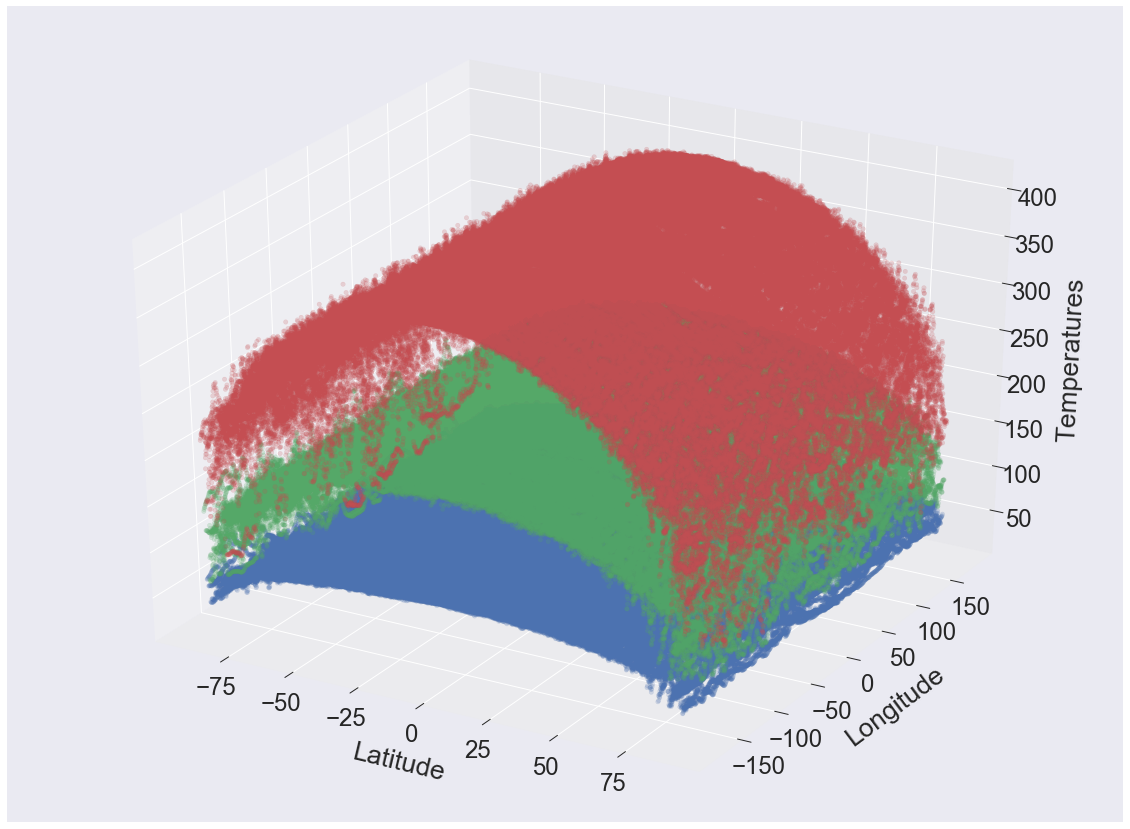

In [47]:
fig = plt.figure(figsize = (20,15))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(completeDataframe['Latitude'], completeDataframe['Longitude'], completeDataframe['Maximum'], c = 'r', label = "Maximum", marker = 'o', alpha = 0.2 )
ax.scatter(completeDataframe['Latitude'], completeDataframe['Longitude'], completeDataframe['Minimum'], c = 'b', label = "Minimum", marker = 'o', alpha = 0.2)
ax.scatter(completeDataframe['Latitude'], completeDataframe['Longitude'], completeDataframe['Mean'], c = 'g', label = "Mean", marker = 'o', alpha = 0.2)


ax.set_xlabel('\n\nLatitude')
ax.set_ylabel('\n\nLongitude')
ax.set_zlabel('\n\nTemperatures')

plt.show()

In [48]:
# th_tif = "LP_GRS_Th_Global_2ppd.tif"
# h_tif = "LP_GRS_H_Global_2ppd.tif"
# fe_tif = "LP_GRS_Fe_Global_2ppd.tif"

# th_gr = gr.from_file(th_tif)
# h_gr = gr.from_file(h_tif)
# fe_gr = gr.from_file(fe_tif)

# th_df = th_gr.to_pandas()
# h_df = h_gr.to_pandas()
# fe_df = fe_gr.to_pandas()

thorium = gr.from_file("LP_GRS_Th_Global_2ppd.tif").to_pandas()
hydrogen = gr.from_file("LP_GRS_H_Global_2ppd.tif").to_pandas()
iron = gr.from_file("LP_GRS_Fe_Global_2ppd.tif").to_pandas()

thorium_values = thorium['value']
thorium_values.name = 'Th'
iron_values = iron['value']
iron_values.name = 'Fe'
hydrogen_values = hydrogen['value']
hydrogen_values.name = 'H'
print("Shape of TH ", thorium.shape)
print("Shape of FE ", iron.shape)
print("Shape of H ", hydrogen.shape)

Shape of TH  (259200, 5)
Shape of FE  (259200, 5)
Shape of H  (259200, 5)


In [49]:
def convertToLatLong(coordX, coordY):
    inProj = Proj(init='epsg:32662')
    outProj = Proj(init='epsg:4326')
    return transform(inProj,outProj,coordX,coordY)

In [50]:
test = thorium

In [51]:
test['Latitude', 'Longitude'] = test.apply(lambda x: convertToLatLong(x['x']*float(3.67), x['y']*float(3.67)), axis = 1)

In [52]:
test.head()

row  col  value             x           y  \
0    0    0     17 -5.458203e+06  2729101.54   
1    0    1     17 -5.443041e+06  2729101.54   
2    0    2     17 -5.427880e+06  2729101.54   
3    0    3     17 -5.412718e+06  2729101.54   
4    0    4     17 -5.397556e+06  2729101.54   

                      (Latitude, Longitude)  
0  (-179.94697209673544, 89.97348604836772)  
1  (-179.44711939719934, 89.97348604836772)  
2  (-178.94726669766328, 89.97348604836772)  
3  (-178.44741399812722, 89.97348604836772)  
4  (-177.94756129859113, 89.97348604836772)

In [53]:
elements_dataframe = pandas.concat([thorium_values, iron_values, hydrogen_values], axis=1)

In [54]:
print(elements_dataframe.corr())

          Th        Fe         H
Th  1.000000  0.748271  0.039447
Fe  0.748271  1.000000 -0.033953
H   0.039447 -0.033953  1.000000


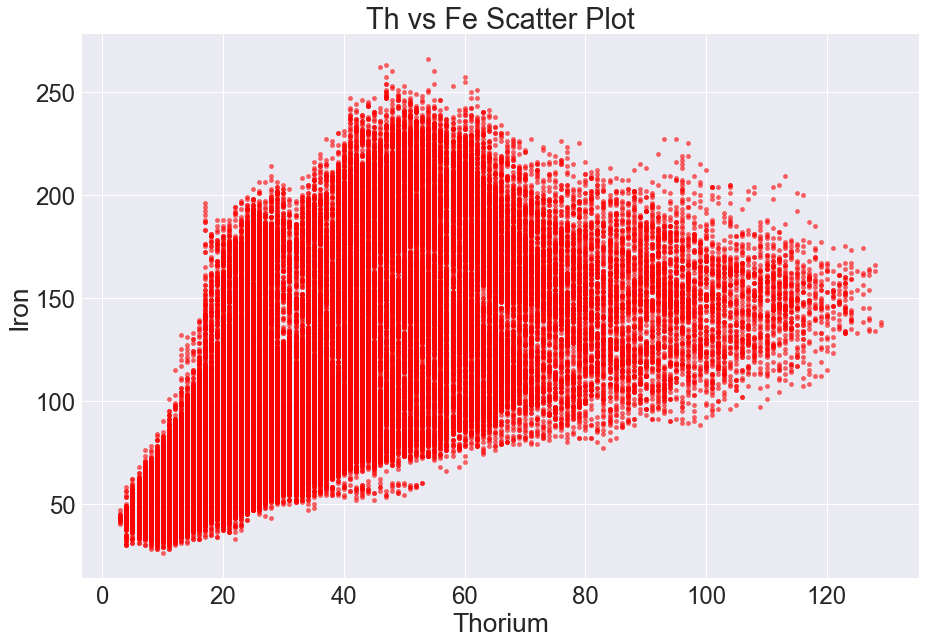

In [55]:
elements_dataframe.plot(kind = 'scatter', x ='Th', y='Fe', alpha = .6, color = 'red')
plt.xlabel('Thorium')
plt.ylabel('Iron')
plt.title('Th vs Fe Scatter Plot')
plt.show()

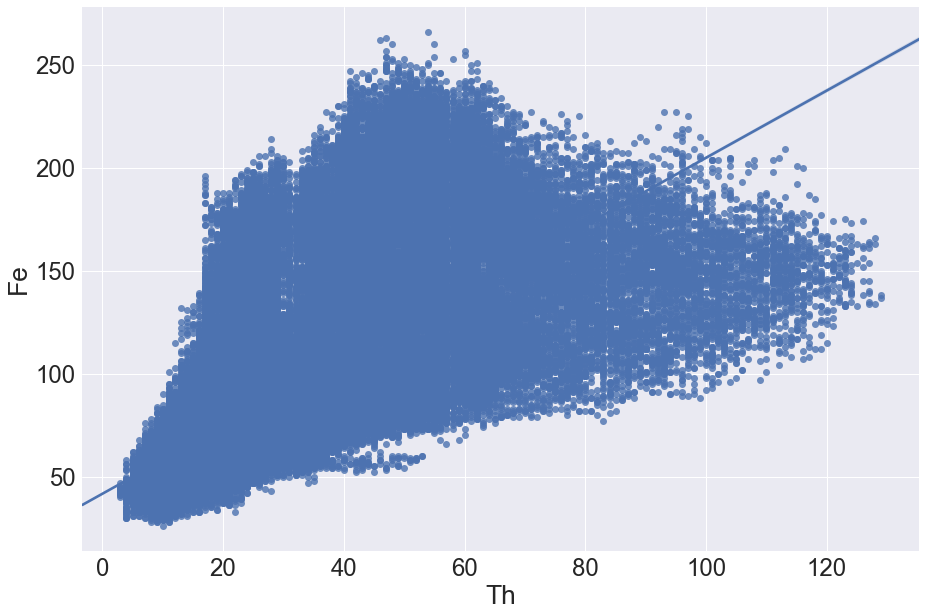

In [56]:
sns.regplot(x="Th", y="Fe", data=elements_dataframe);

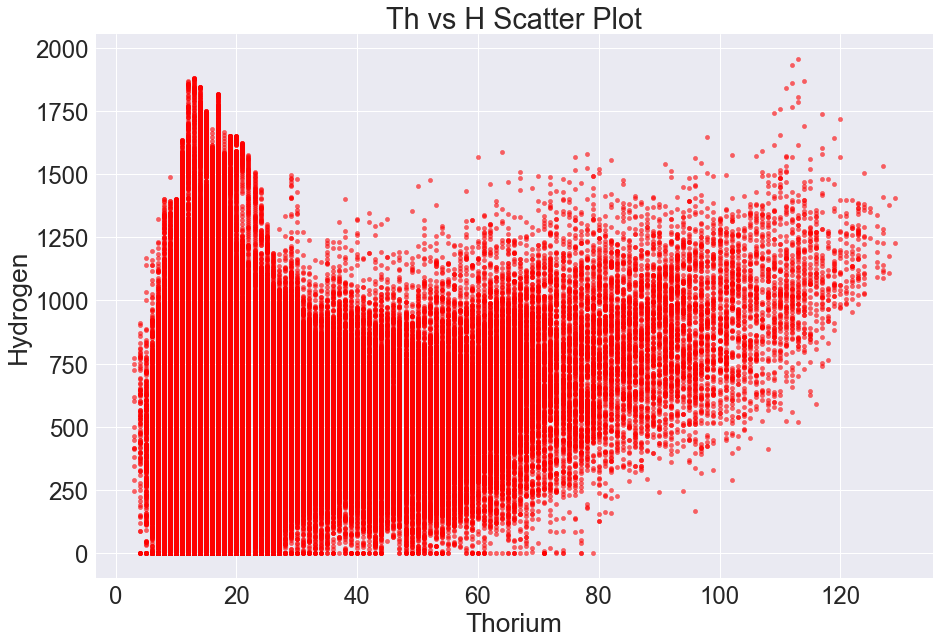

In [57]:
elements_dataframe.plot(kind = 'scatter', x ='Th', y='H', alpha = .6, color = 'red')
plt.xlabel('Thorium')
plt.ylabel('Hydrogen')
plt.title('Th vs H Scatter Plot')
plt.show()

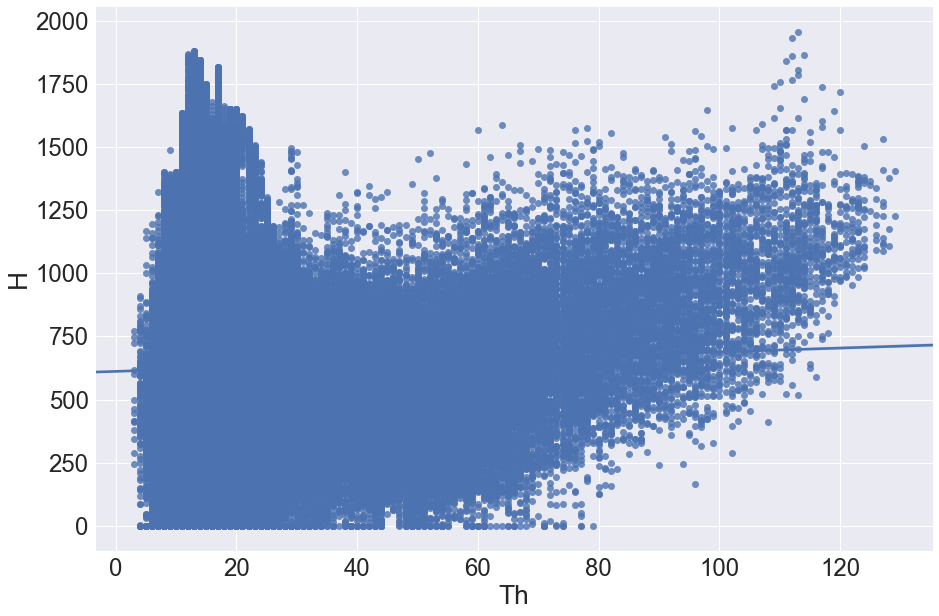

In [58]:
sns.regplot(x="Th", y="H", data=elements_dataframe);

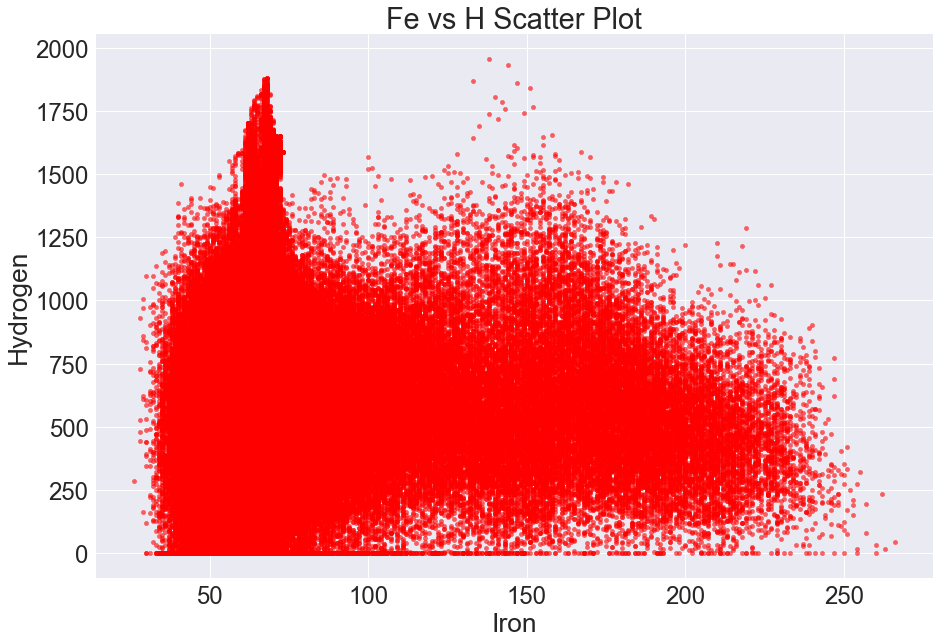

In [59]:
elements_dataframe.plot(kind = 'scatter', x ='Fe', y='H', alpha = .6, color = 'red')
plt.xlabel('Iron')
plt.ylabel('Hydrogen')
plt.title('Fe vs H Scatter Plot')
plt.show()

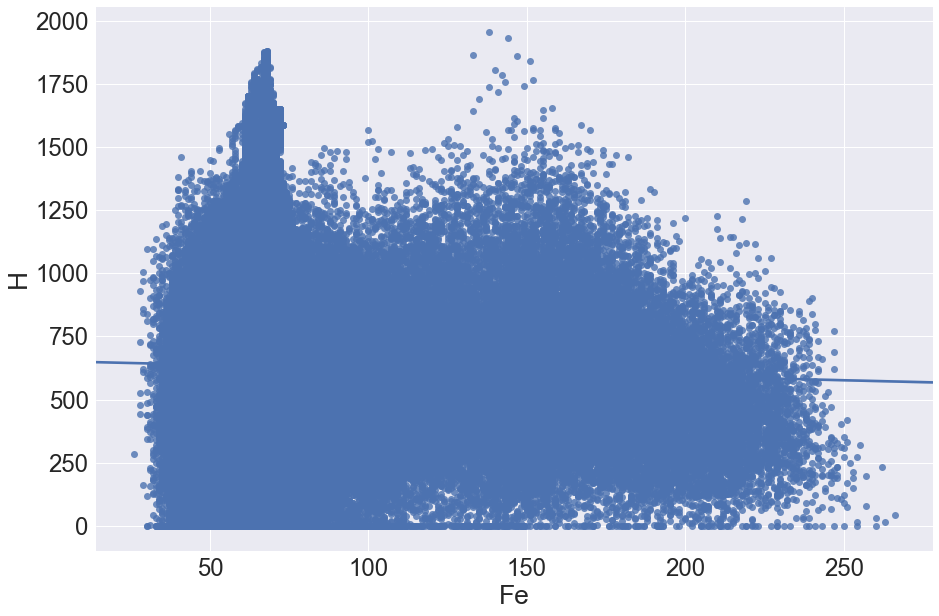

In [60]:
sns.regplot(x="Fe", y="H", data=elements_dataframe);

In [61]:
print(elements_dataframe.corr().describe())

             Th        Fe         H
count  3.000000  3.000000  3.000000
mean   0.595906  0.571440  0.335165
std    0.498073  0.539181  0.576933
min    0.039447 -0.033953 -0.033953
25%    0.393859  0.357159  0.002747
50%    0.748271  0.748271  0.039447
75%    0.874136  0.874136  0.519724
max    1.000000  1.000000  1.000000


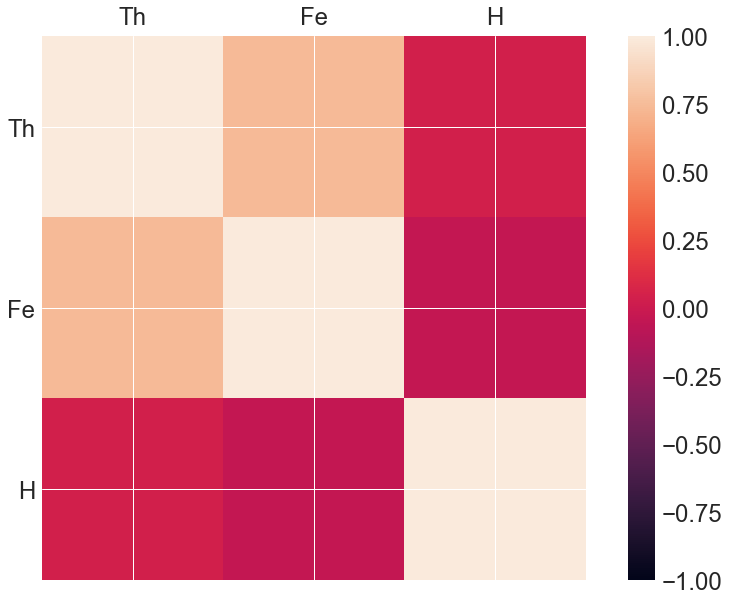

In [62]:
correlations = elements_dataframe.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = numpy.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(elements_dataframe.columns)
ax.set_yticklabels(elements_dataframe.columns)
plt.show()

In [63]:
print(elements_dataframe.corr())

          Th        Fe         H
Th  1.000000  0.748271  0.039447
Fe  0.748271  1.000000 -0.033953
H   0.039447 -0.033953  1.000000


In [64]:
thorium.head()

row  col  value             x           y  \
0    0    0     17 -5.458203e+06  2729101.54   
1    0    1     17 -5.443041e+06  2729101.54   
2    0    2     17 -5.427880e+06  2729101.54   
3    0    3     17 -5.412718e+06  2729101.54   
4    0    4     17 -5.397556e+06  2729101.54   

                      (Latitude, Longitude)  
0  (-179.94697209673544, 89.97348604836772)  
1  (-179.44711939719934, 89.97348604836772)  
2  (-178.94726669766328, 89.97348604836772)  
3  (-178.44741399812722, 89.97348604836772)  
4  (-177.94756129859113, 89.97348604836772)

In [65]:
hydrogen.head()

row  col  value             x           y
0    0    0   1555 -5.458203e+06  2729101.54
1    0    1   1555 -5.443041e+06  2729101.54
2    0    2   1555 -5.427880e+06  2729101.54
3    0    3   1555 -5.412718e+06  2729101.54
4    0    4   1556 -5.397556e+06  2729101.54

In [66]:
iron.head()

row  col  value             x           y
0    0    0     71 -5.458203e+06  2729101.54
1    0    1     71 -5.443041e+06  2729101.54
2    0    2     71 -5.427880e+06  2729101.54
3    0    3     71 -5.412718e+06  2729101.54
4    0    4     71 -5.397556e+06  2729101.54

In [67]:
element_df = thorium.rename(index = str, columns={"value": "thorium"})
hydrogen.rename(index=str, columns={"value": "hydrogen"})
iron.rename(index=str, columns={"value": "iron"}).head()

row  col  iron             x           y
0    0    0    71 -5.458203e+06  2729101.54
1    0    1    71 -5.443041e+06  2729101.54
2    0    2    71 -5.427880e+06  2729101.54
3    0    3    71 -5.412718e+06  2729101.54
4    0    4    71 -5.397556e+06  2729101.54

In [68]:
element_df = element_df.merge(hydrogen.rename(index=str, columns={"value":"hydrogen"}), left_on=['row', 'col', 'x', 'y'], right_on=['row', 'col', 'x', 'y'], how="outer")
element_df = element_df.merge(iron.rename(index=str, columns={"value": "iron"}), left_on=['row', 'col', 'x', 'y'], right_on=['row', 'col', 'x', 'y'], how="outer")

In [69]:
element_df.head()

row  col  thorium             x           y  \
0    0    0       17 -5.458203e+06  2729101.54   
1    0    1       17 -5.443041e+06  2729101.54   
2    0    2       17 -5.427880e+06  2729101.54   
3    0    3       17 -5.412718e+06  2729101.54   
4    0    4       17 -5.397556e+06  2729101.54   

                      (Latitude, Longitude)  hydrogen  iron  
0  (-179.94697209673544, 89.97348604836772)      1555    71  
1  (-179.44711939719934, 89.97348604836772)      1555    71  
2  (-178.94726669766328, 89.97348604836772)      1555    71  
3  (-178.44741399812722, 89.97348604836772)      1555    71  
4  (-177.94756129859113, 89.97348604836772)      1556    71

In [70]:
element_df = element_df[['x', 'y', 'thorium', 'hydrogen', 'iron']]
element_df.head()

x           y  thorium  hydrogen  iron
0 -5.458203e+06  2729101.54       17      1555    71
1 -5.443041e+06  2729101.54       17      1555    71
2 -5.427880e+06  2729101.54       17      1555    71
3 -5.412718e+06  2729101.54       17      1555    71
4 -5.397556e+06  2729101.54       17      1556    71

In [71]:
feature_cols = ['thorium', 'hydrogen', 'iron']
MMS = preprocessing.MinMaxScaler()
normalized = MMS.fit_transform(element_df[feature_cols])
normalized = pandas.DataFrame(normalized)
normalized_df = normalized.rename(columns={0: "thorium", 1: "hydrogen", 2: "iron"})
normalized_df.head()

thorium  hydrogen    iron
0  0.111111  0.795396  0.1875
1  0.111111  0.795396  0.1875
2  0.111111  0.795396  0.1875
3  0.111111  0.795396  0.1875
4  0.111111  0.795908  0.1875

In [72]:
normalized_df['x'] = element_df['x']
normalized_df['y'] = element_df['y']
normalized_df.head()


thorium  hydrogen    iron             x           y
0  0.111111  0.795396  0.1875 -5.458203e+06  2729101.54
1  0.111111  0.795396  0.1875 -5.443041e+06  2729101.54
2  0.111111  0.795396  0.1875 -5.427880e+06  2729101.54
3  0.111111  0.795396  0.1875 -5.412718e+06  2729101.54
4  0.111111  0.795908  0.1875 -5.397556e+06  2729101.54

In [73]:
print(element_df['thorium'].max())
print(element_df['thorium'].min())
print(normalized_df['thorium'].max())
print(normalized_df['thorium'].min())


129
3
1.0
0.0


In [74]:
print(element_df['hydrogen'].max())
print(element_df['hydrogen'].min())
print(normalized_df['hydrogen'].max())
print(normalized_df['hydrogen'].min())


1955
0
1.0
0.0


In [75]:
print(element_df['iron'].max())
print(element_df['iron'].min())

266
26


In [76]:
dummies_df = pandas.get_dummies(normalized_df, columns=['x', 'y'])
dummies_df.head()

thorium  hydrogen    iron  x_-5458203.08  x_-5443041.4048  \
0  0.111111  0.795396  0.1875              1                0   
1  0.111111  0.795396  0.1875              0                1   
2  0.111111  0.795396  0.1875              0                0   
3  0.111111  0.795396  0.1875              0                0   
4  0.111111  0.795908  0.1875              0                0   

   x_-5427879.7296  x_-5412718.0544  x_-5397556.3792  x_-5382394.704  \
0                0                0                0               0   
1                0                0                0               0   
2                1                0                0               0   
3                0                1                0               0   
4                0                0                1               0   

   x_-5367233.0288      ...       y_2592646.4632  y_2607808.1384  \
0                0      ...                    0               0   
1                0      ...                    0               0   
2                0      ...                    0               0   
3                0      ...                    0               0   
4                0      ...                    0               0   

   y_2622969.8136  y_2638131.4888  y_2653293.164  y_2668454.8392  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0              0               0   
3               0               0              0               0   
4               0               0              0               0   

   y_2683616.5144  y_2698778.1896  y_2713939.8648  y_2729101.54  
0               0               0               0             1  
1               0               0               0             1  
2               0               0               0             1  
3               0               0               0             1  
4               0               0               0             1  

[5 rows x 1083 columns]

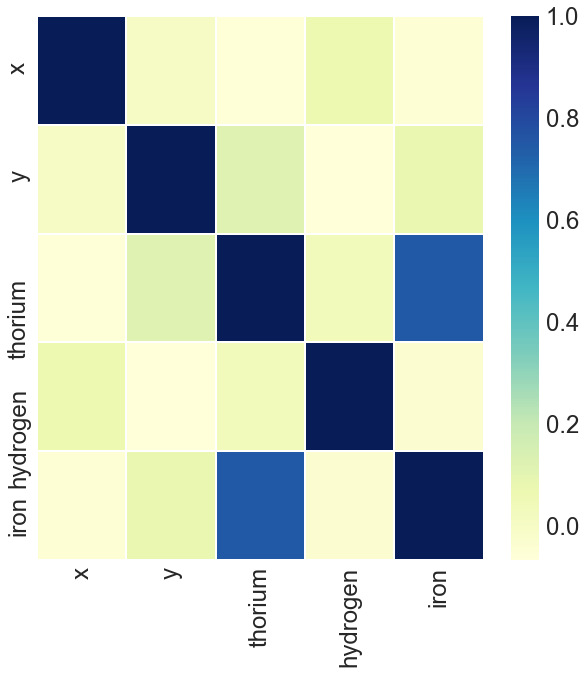

In [77]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(element_df.corr(), annot=False, linewidth=1, ax=ax, cmap="YlGnBu")

plt.show()

In [78]:
element_df.head()

x           y  thorium  hydrogen  iron
0 -5.458203e+06  2729101.54       17      1555    71
1 -5.443041e+06  2729101.54       17      1555    71
2 -5.427880e+06  2729101.54       17      1555    71
3 -5.412718e+06  2729101.54       17      1555    71
4 -5.397556e+06  2729101.54       17      1556    71

In [79]:
linreg = LinearRegression()

In [80]:
X = element_df[['x', 'y']]
y = element_df['thorium']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [82]:
rfreg = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse)
print(rmse)

0.49967794412


In [83]:
rfreg.score(X_test, y_test)

0.99912437320565917

In [84]:
rfreg.score(X_train, y_train)

0.99981519552262199

In [85]:
X = element_df[['x', 'y']]
y = element_df['hydrogen']
rfreg = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)
print(rfreg.score(X_test, y_test))
print(rfreg.score(X_train, y_train))
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse)
print(rmse)

0.972764932736
0.994502093728
53.6253794412


In [86]:
X = element_df[['x', 'y']]
y = element_df['iron']
rfreg = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)
print(rfreg.score(X_test, y_test))
print(rfreg.score(X_train, y_train))
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse)
print(rmse)

0.99555046493
0.999189057573
2.43872476352


In [87]:
element_df.head()

x           y  thorium  hydrogen  iron
0 -5.458203e+06  2729101.54       17      1555    71
1 -5.443041e+06  2729101.54       17      1555    71
2 -5.427880e+06  2729101.54       17      1555    71
3 -5.412718e+06  2729101.54       17      1555    71
4 -5.397556e+06  2729101.54       17      1556    71

In [88]:
dummies_df.head()

thorium  hydrogen    iron  x_-5458203.08  x_-5443041.4048  \
0  0.111111  0.795396  0.1875              1                0   
1  0.111111  0.795396  0.1875              0                1   
2  0.111111  0.795396  0.1875              0                0   
3  0.111111  0.795396  0.1875              0                0   
4  0.111111  0.795908  0.1875              0                0   

   x_-5427879.7296  x_-5412718.0544  x_-5397556.3792  x_-5382394.704  \
0                0                0                0               0   
1                0                0                0               0   
2                1                0                0               0   
3                0                1                0               0   
4                0                0                1               0   

   x_-5367233.0288      ...       y_2592646.4632  y_2607808.1384  \
0                0      ...                    0               0   
1                0      ...                    0               0   
2                0      ...                    0               0   
3                0      ...                    0               0   
4                0      ...                    0               0   

   y_2622969.8136  y_2638131.4888  y_2653293.164  y_2668454.8392  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0              0               0   
3               0               0              0               0   
4               0               0              0               0   

   y_2683616.5144  y_2698778.1896  y_2713939.8648  y_2729101.54  
0               0               0               0             1  
1               0               0               0             1  
2               0               0               0             1  
3               0               0               0             1  
4               0               0               0             1  

[5 rows x 1083 columns]

In [89]:
element_df.shape

(259200, 5)

<function matplotlib.pyplot.show>

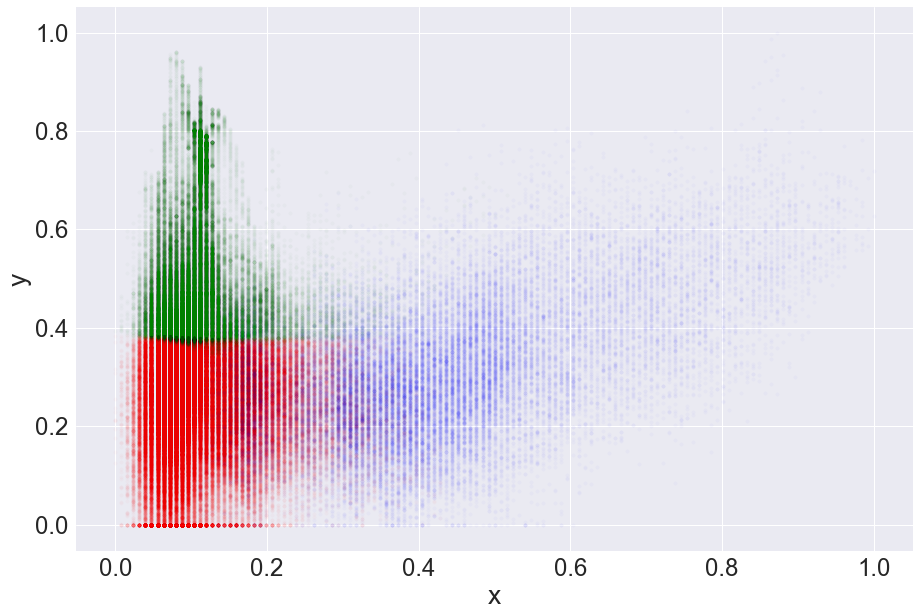

In [167]:
X = dummies_df
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.figure

for l, c in zip([0, 1, 2], ['red', 'blue', 'green']):
    current_members = (labels == l)
    current_center = centers[1]
    plt.scatter(X.iloc[current_members, 0], X.iloc[current_members, 1], color = c, marker = '.', alpha=0.02)
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = 'black', markersize=1, alpha=1, marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show

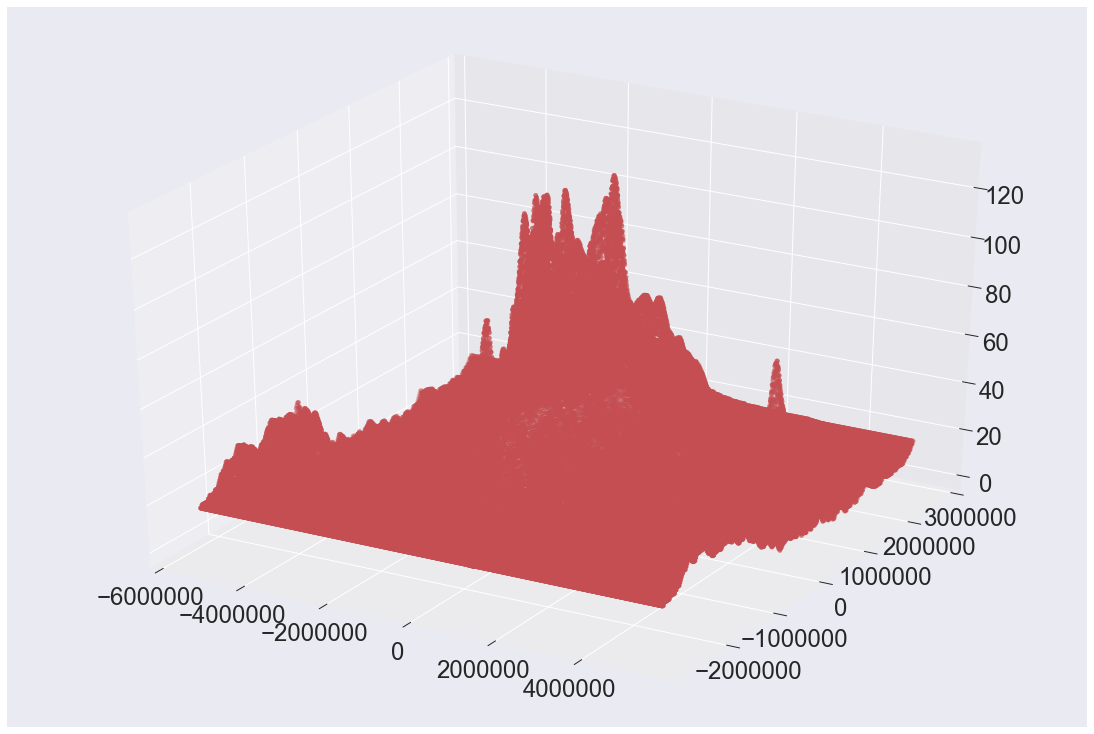

In [91]:
# X = dummies_df
# kmeans = KMeans(n_clusters = 3)
# kmeans.fit(X)
# labels = kmeans.labels_
# centers = kmeans.cluster_centers_
# fig = plt.figure()

# ax = Axes3D(fig)
# ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c='rgb')
# ax.scatter(centers[:,0], centers[:,1], centers[:,2], marker = "*", c='rgb', s=1000)

# for l, c in zip([0, 1, 2], ['red', 'blue', 'green']):
#     current_members = (labels == l)
#     current_center = centers[1]
#     ax = Axes3D(fig)
#     ax.scatter(X.iloc[current_members, 0], X.iloc[current_members, 1], color = c, marker = '.')
#     plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c, markeredgecolor = 'k', markersize=.5)
    
# ax.xlabel('x')
# ax.ylabel('y')
# ax.show

# for l, c in zip([0, 1, 2], ['red', 'blue', 'green']):
#     current_members = (labels == l)
#     current_center = centers[1]
#     plt.scatter(X.iloc[current_members, 0], X.iloc[current_members, 1], color = c, marker = 'x')
#     plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c, markeredgecolor = 'k', markersize=.5)

thor = thorium[['x','y','value']]
X = thor
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# labels = kmeans.labels_
# centers = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c='r')
# ax.scatter(hy.iloc[:,0], hy.iloc[:,1], hy.iloc[:,2], c='g')
# ax.scatter(centers[:,0], centers[:,1], centers[:,2], marker = "*", c='rgb', s=1000)

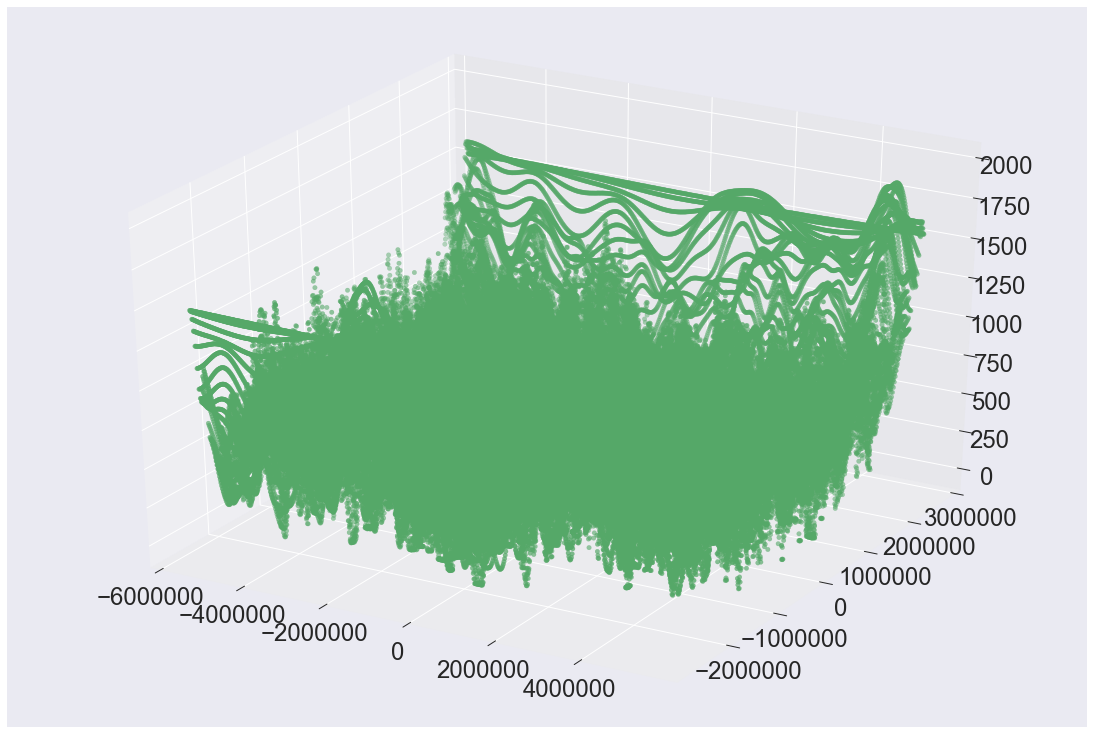

In [92]:
hy = hydrogen[['x', 'y', 'value']]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(hy.iloc[:,0], hy.iloc[:,1], hy.iloc[:,2], c='g')

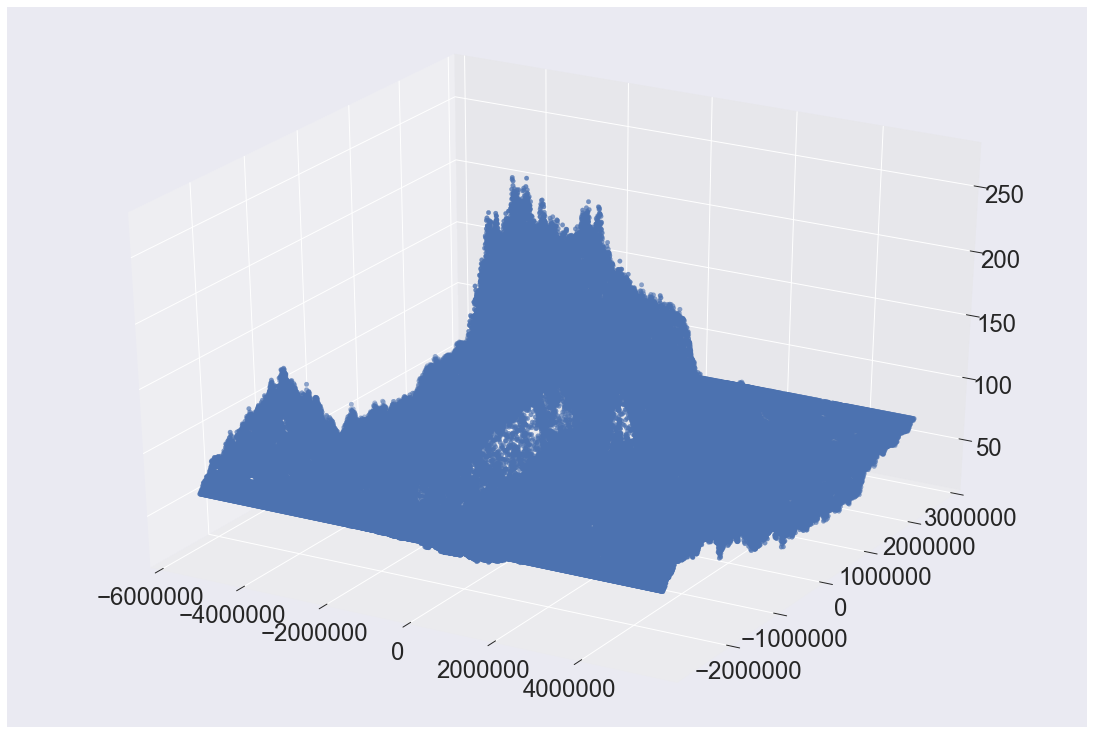

In [93]:
ir = iron[['x', 'y', 'value']]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(ir.iloc[:,0], ir.iloc[:,1], ir.iloc[:,2], c='b')

In [94]:
thorium.head()
thor = thorium[['x', 'y', 'value']]
thor.head()

x           y  value
0 -5.458203e+06  2729101.54     17
1 -5.443041e+06  2729101.54     17
2 -5.427880e+06  2729101.54     17
3 -5.412718e+06  2729101.54     17
4 -5.397556e+06  2729101.54     17

[[  1.07959613e-01   6.81863318e-01   1.68892353e-01 ...,   3.33765993e-02
    3.33765993e-02   3.33765993e-02]
 [  5.78079980e-01   4.15371962e-01   4.60550176e-01 ...,   2.26381414e-16
    2.26381414e-16   2.26381414e-16]
 [  1.09068526e-01   1.75371243e-01   1.55132577e-01 ...,   4.70110062e-15
    4.70110062e-15   4.70110062e-15]
 [  3.21844097e-01   2.37959929e-01   5.91557498e-01 ...,  -8.09248502e-16
   -8.09248502e-16  -8.09248502e-16]
 [  1.13191951e-01   3.84079379e-01   1.72075433e-01 ...,   2.07429560e-15
    2.07429560e-15   2.07429560e-15]]


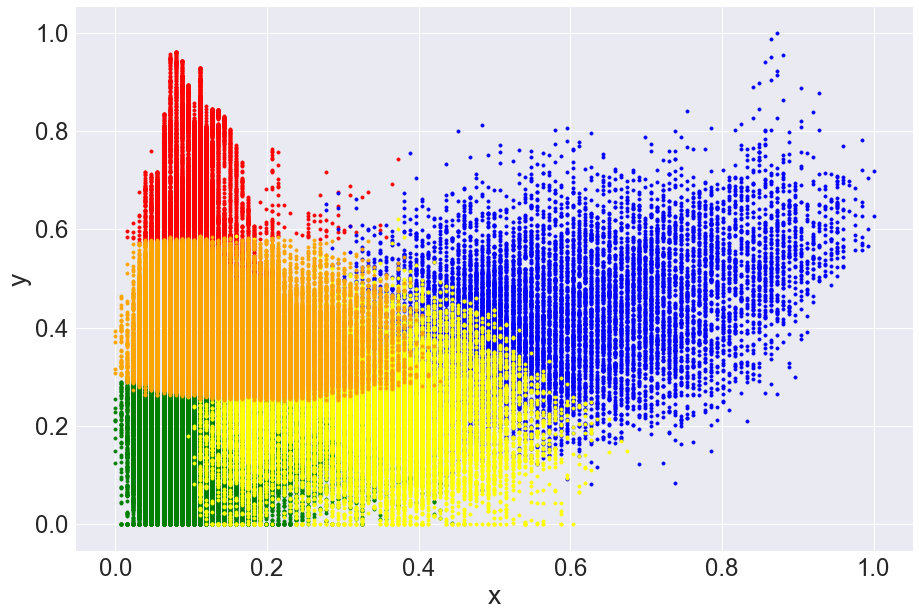

In [95]:
X = dummies_df
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.figure

for l, c in zip([0, 1, 2, 3, 4], ['red', 'blue', 'green', 'yellow', 'orange']):
    current_members = (labels == l)
    current_center = centers[1]
    plt.scatter(X.iloc[current_members, 0], X.iloc[current_members, 1], color = c, marker = '.')
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c, markeredgecolor = 'k', markersize=.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show
print(centers)

In [96]:
print(centers)

[[  1.07959613e-01   6.81863318e-01   1.68892353e-01 ...,   3.33765993e-02
    3.33765993e-02   3.33765993e-02]
 [  5.78079980e-01   4.15371962e-01   4.60550176e-01 ...,   2.26381414e-16
    2.26381414e-16   2.26381414e-16]
 [  1.09068526e-01   1.75371243e-01   1.55132577e-01 ...,   4.70110062e-15
    4.70110062e-15   4.70110062e-15]
 [  3.21844097e-01   2.37959929e-01   5.91557498e-01 ...,  -8.09248502e-16
   -8.09248502e-16  -8.09248502e-16]
 [  1.13191951e-01   3.84079379e-01   1.72075433e-01 ...,   2.07429560e-15
    2.07429560e-15   2.07429560e-15]]


In [97]:
resized_lola = gr.from_file("./temperature_xyz/resizedLOLA.xyz").to_pandas()

In [98]:
resized_lola.head()

row  col  value      x     y
0    0    0  -81.5 -180.0  90.0
1    0    1  -82.0 -179.5  90.0
2    0    2  -85.0 -179.0  90.0
3    0    3  -89.0 -178.5  90.0
4    0    4 -109.0 -178.0  90.0

In [99]:
element_df.head()

x           y  thorium  hydrogen  iron
0 -5.458203e+06  2729101.54       17      1555    71
1 -5.443041e+06  2729101.54       17      1555    71
2 -5.427880e+06  2729101.54       17      1555    71
3 -5.412718e+06  2729101.54       17      1555    71
4 -5.397556e+06  2729101.54       17      1556    71

In [100]:
element_df.shape

(259200, 5)

In [101]:
resized_lola.shape

(259200, 5)

In [102]:
new_element_df = element_df[['thorium', 'hydrogen', 'iron']]

In [103]:
new_element_df['lola_value'] = resized_lola['value']
new_element_df.head()

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


thorium  hydrogen  iron  lola_value
0       17      1555    71       -81.5
1       17      1555    71       -82.0
2       17      1555    71       -85.0
3       17      1555    71       -89.0
4       17      1556    71      -109.0

In [104]:
test.head()

row  col  value             x           y  \
0    0    0     17 -5.458203e+06  2729101.54   
1    0    1     17 -5.443041e+06  2729101.54   
2    0    2     17 -5.427880e+06  2729101.54   
3    0    3     17 -5.412718e+06  2729101.54   
4    0    4     17 -5.397556e+06  2729101.54   

                      (Latitude, Longitude)  
0  (-179.94697209673544, 89.97348604836772)  
1  (-179.44711939719934, 89.97348604836772)  
2  (-178.94726669766328, 89.97348604836772)  
3  (-178.44741399812722, 89.97348604836772)  
4  (-177.94756129859113, 89.97348604836772)

In [105]:
test.columns

Index(['row', 'col', 'value', 'x', 'y', ('Latitude', 'Longitude')], dtype='object')

In [106]:
test[('Latitude', 'Longitude')].head()

0    (-179.94697209673544, 89.97348604836772)
1    (-179.44711939719934, 89.97348604836772)
2    (-178.94726669766328, 89.97348604836772)
3    (-178.44741399812722, 89.97348604836772)
4    (-177.94756129859113, 89.97348604836772)
Name: (Latitude, Longitude), dtype: object

In [107]:
type(test[('Latitude', 'Longitude')][0][0])

float

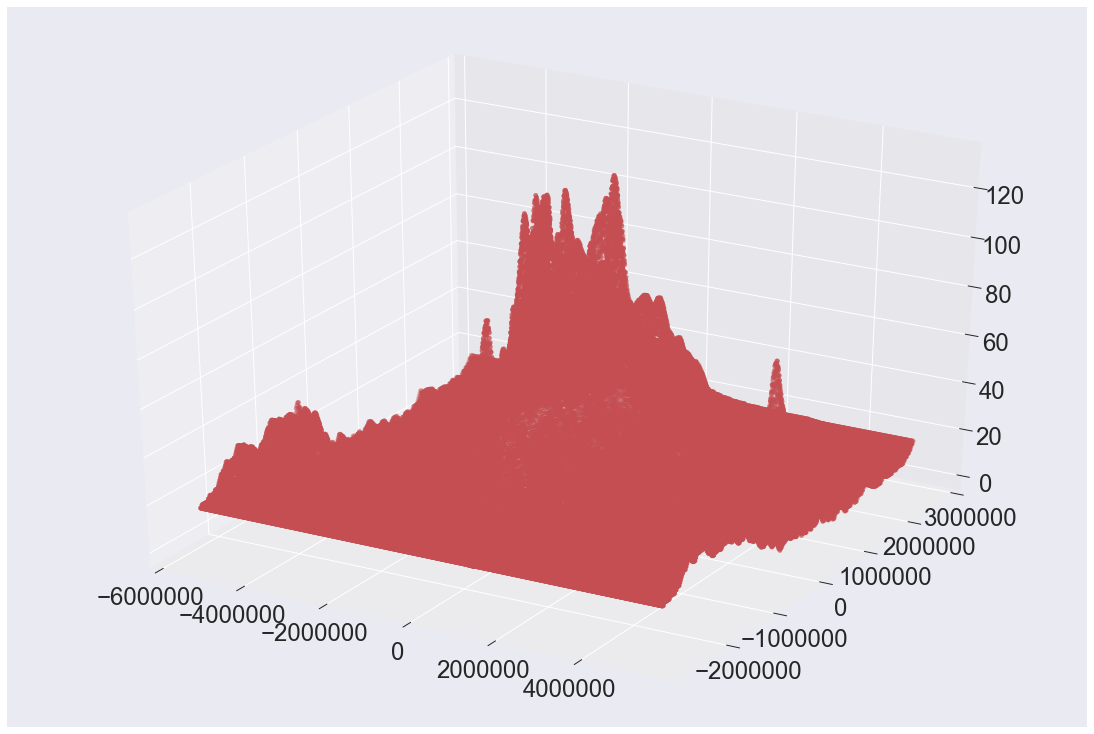

In [108]:
X = element_df
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# labels = kmeans.labels_
# centers = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c='r')
# ax.scatter(hy.iloc[:,0], hy.iloc[:,1], hy.iloc[:,2], c='g')
# ax.scatter(centers[:,0], centers[:,1], centers[:,2], marker = "*", c='rgb', s=1000)

In [114]:
elements = element_df[['thorium', 'hydrogen', 'iron']]
# kmeans = KMeans(n_clusters = 3)
# kmeans.fit(elements)
# labels = kmeans.labels_
# centers = kmeans.cluster_centers_

# fig = plt.figure()
# ax = Axes3D(fig)




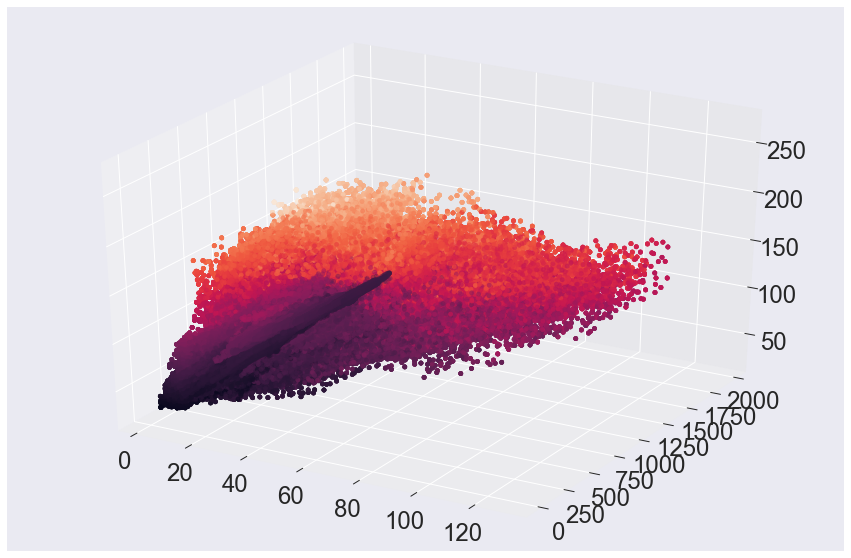

In [153]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(elements)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ['r', 'g', 'b', 'c', 'y', 'm']

fig = plt.figure()
ax = fig.gca(projection='3d')


for index, i in enumerate(X):
    ax.scatter(elements.iloc[:,0], elements.iloc[:,1], elements.iloc[:,2], c=y)

plt.show()

In [111]:
print(len(X))

259200


In [116]:
centroids

array([[   22.73017441,   715.74041241,    78.34383632],
       [   21.30448837,   331.08084899,    78.65960471],
       [   22.94889529,  1248.26397321,    73.51580397]])

/usr/local/lib/python3.5/site-packages/mpl_toolkits/mplot3d/art3d.py:724: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.5/site-packages/mpl_toolkits/mplot3d/art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


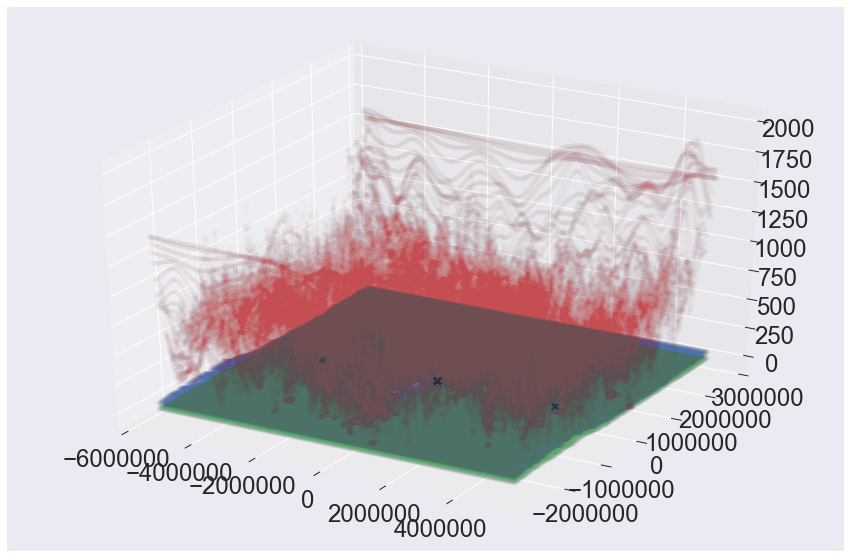

In [160]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(element_df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ['r', 'g', 'b', 'c', 'y', 'm']

fig = plt.figure()
ax = fig.gca(projection='3d')

# for index, i in enumerate(element_df):
#     ax.plot(element_df.iloc[:,0], element_df.iloc[:,1], element_df.iloc[:,2], element_df.iloc[:,3], element_df.iloc[:,4])
#     ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], centroids[:,3], centroids[:,4], color=colors[index])
# ax.scatter(element_df.iloc[:,0], element_df.iloc[:,1], element_df.iloc[:,2], element_df.iloc[:,3], element_df.iloc[:,4], c='y')

ax.scatter(element_df.iloc[:,0], element_df.iloc[:,1], element_df.iloc[:,2], c='g', alpha=0.01)
ax.scatter(element_df.iloc[:,0], element_df.iloc[:,1], element_df.iloc[:,3], c='r', alpha=0.01)
ax.scatter(element_df.iloc[:,0], element_df.iloc[:,1], element_df.iloc[:,4], c='b', alpha=0.01)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], centroids[:,3], centroids[:,4], marker='X', c='black', alpha=1)



In [133]:
element_df.head()

x           y  thorium  hydrogen  iron
0 -5.458203e+06  2729101.54       17      1555    71
1 -5.443041e+06  2729101.54       17      1555    71
2 -5.427880e+06  2729101.54       17      1555    71
3 -5.412718e+06  2729101.54       17      1555    71
4 -5.397556e+06  2729101.54       17      1556    71

In [168]:
centroids[:,0]

array([    7580.8296    , -3638802.05600002,  3638802.04000002])